# Graphiques du Tableau pour Cerlico : Entités nommées

### Importation des modules

- pickle pour la récupération des données de Conscila
- pandas pour la gestion des csv et les calculs type excel
- numpy pour les calculs en général
- matplotlib pour les graphiques

In [963]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy,datetime,pickle,re,codecs,unidecode
import io
from lxml import etree
from IPython.display import display

In [964]:
pd.__version__

u'0.24.2'

In [965]:
%matplotlib inline

In [966]:
import seaborn as sns
sns.set(style="ticks")
sns.set_style("whitegrid")
sns.set_palette("husl")
#sns.palplot(sns.color_palette("hls", 20))
sns.set_context("talk")
#sns.set_context("notebook")
#sns.set_context("paper")

In [967]:
spkNoms={"spk1":"journaliste","spk2":"expert","spk3":"terrain"}
equipesDrapeau={"=Fr":u"🇫🇷","=Ar":u"🇦🇷"}

In [968]:
with open("partieGlobale.pkl","rb") as inFile:
    dfComplet=pickle.load(inFile)

In [969]:
dfComplet["excitation"]=pd.to_numeric(dfComplet["excitation"], errors='coerce')
dfComplet["début"]=pd.to_numeric(dfComplet["début"], errors='coerce')
dfComplet["fin"]=pd.to_numeric(dfComplet["fin"], errors='coerce')

In [970]:
dfTest=dfComplet["Spk noms joueurs texte-PxP texte-colour discours excitation".split(" ")]
dfTest[(dfTest["noms"].notnull())&(dfTest["texte-PxP"].notnull())&(dfTest["Spk"]=="spk2")].groupby(["joueurs","noms"])[["texte-PxP"]].count()

texte-PxP
joueurs                                            noms                              
Agustín Pichot=Ar                                  Agustin Pichot                   1
Christophe Dominici=Fr                             Dominici                         1
Cédric Heymans=Fr                                  Heymans                          1
Damien Traille=Fr                                  Traille                          2
Damien Traille=Fr;Rémy Martin=Fr                   Traille,Rémy Martin              1
David Skrela=Fr                                    Skrela                           2
Juan Martín Hernández=Ar                           Hernandez                        1
Lucas Borges=Ar                                    Borges                           1
Manuel Contepomi=Ar;Felipe Contepomi=Ar            Contepomi                        1
Mario Ledesma=Ar                                   Ledesma                          1
Pierre Mignoni=Fr                                  Mignoni                          1
Pieter de Villiers=Fr                              Pieter de Villiers               1
Raphaël Ibañez=Fr                                  Ibañez                           2
Rémy Martin=Fr                                     Rémy                             1
                                                   Rémy Martin                      2
                                                   Rémy Martin,Rémy Martin          1
Rémy Martin=Fr;Martín Schusterman=Ar;Juan Martí... Martin                           4
Serge Betsen=Fr                                    Betsen                           1
Sébastien Chabal=Fr                                Chabal                           1

In [987]:
dfTemp=dfComplet.iloc[:15700]
display(dfTemp["excitation"].unique())
dfTemp[dfTemp["texte"].notnull()]["texte"].count()

array([nan,  2.,  0.,  4.])

2020

## Interpolation des valeurs numériques

In [791]:
dfMatch=dfComplet.iloc[:15700].set_index("timeline")
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "):
    dfMatch[c]=dfMatch[c].interpolate(method="index")

## Remise à zéro des valeurs numériques pendant la mi-temps

In [792]:
for c in ["excitation","RJ5.00","D5.00","V5.00"]+"S1D5.00 S2D5.00 S3D5.00 V5.00 S1V5.00 S2V5.00 S3V5.00".split(" "): 
    dfMatch.loc[(dfMatch.index>271985)&(dfMatch.index<325843),c]=0

In [793]:
dfMatch[((dfMatch.index>271985)&(dfMatch.index<325843))][["excitation","RJ5.00"]]
#dfMatch.columns

excitation  RJ5.00
timeline                    
272000.0         0.0     0.0
272100.0         0.0     0.0
272200.0         0.0     0.0
272300.0         0.0     0.0
272400.0         0.0     0.0
272500.0         0.0     0.0
272600.0         0.0     0.0
272700.0         0.0     0.0
272800.0         0.0     0.0
272900.0         0.0     0.0
273000.0         0.0     0.0
273100.0         0.0     0.0
273200.0         0.0     0.0
273300.0         0.0     0.0
273400.0         0.0     0.0
273500.0         0.0     0.0
273600.0         0.0     0.0
273700.0         0.0     0.0
273800.0         0.0     0.0
273900.0         0.0     0.0
274000.0         0.0     0.0
274100.0         0.0     0.0
274200.0         0.0     0.0
274300.0         0.0     0.0
274400.0         0.0     0.0
274500.0         0.0     0.0
274600.0         0.0     0.0
274700.0         0.0     0.0
274800.0         0.0     0.0
274900.0         0.0     0.0
...              ...     ...
322900.0         0.0     0.0
323000.0         0.0     0.0
323100.0         0.0     0.0
323200.0         0.0     0.0
323300.0         0.0     0.0
323400.0         0.0     0.0
323500.0         0.0     0.0
323600.0         0.0     0.0
323700.0         0.0     0.0
323800.0         0.0     0.0
323900.0         0.0     0.0
324000.0         0.0     0.0
324100.0         0.0     0.0
324200.0         0.0     0.0
324300.0         0.0     0.0
324400.0         0.0     0.0
324500.0         0.0     0.0
324600.0         0.0     0.0
324700.0         0.0     0.0
324800.0         0.0     0.0
324900.0         0.0     0.0
325000.0         0.0     0.0
325100.0         0.0     0.0
325200.0         0.0     0.0
325300.0         0.0     0.0
325400.0         0.0     0.0
325500.0         0.0     0.0
325600.0         0.0     0.0
325700.0         0.0     0.0
325800.0         0.0     0.0

[539 rows x 2 columns]

# Traitement des corrections manuelles des Entités nommées
- quelques corrections supplémentaires dans le XLS-CM directement par GB

In [794]:
dfXLS=pd.read_excel("partieGlobale-Joueurs-CM.xlsx")

In [795]:
dfNomsXLS=dfXLS[dfXLS["joueurs"].notnull()].set_index("timeline")[["noms","joueurs"]]

In [796]:
dfMatch.update(dfNomsXLS)

In [797]:
dfMatch.columns=[u'RJ5.00', u'RC5.00', u'trscode', u'D5.00', u'S1D5.00', u'S2D5.00',
       u'S3D5.00', u'V5.00', u'S1V5.00', u'S2V5.00', u'S3V5.00', u'timecode',
       u'début', u'fin', u'numEvent', u'événement', u'numAct', u'action',
       u'commentaires', u'numSpk', u'Spk', u'texte', u'texte-PxP',
       u'texte-colour', u'texte-support', u'dureeS1', u'dureeS2', u'PxP',
       u'colour', u'support', u'sumPxP', u'sumColour', u'sumSupport', u'pause',
       u'suivant', u'durée', u'plage', u'même', u'start', u'end', u'discours',
       u'émotion', u'excitation', u'duréeTour', u'noms', u'joueurs']

In [798]:
selectColonnesNoms=u"Spk noms joueurs excitation émotion discours texte texte-PxP texte-colour début fin RJ5.00 D5.00 S1D5.00".split(" ")
dfNomsMatch=dfMatch[selectColonnesNoms]

In [799]:
dfNomsMatch[dfNomsMatch["joueurs"].notnull()][["Spk","joueurs",u"début","fin","discours"]]

Spk                                          joueurs    début  \
timeline                                                                   
3616.0    spk1                                  David Skrela=Fr    36.16   
4232.0    spk1                               Rodrigo Roncero=Ar    42.32   
4456.0    spk1                                Agustín Pichot=Ar    44.56   
4656.0    spk1                         Juan Martín Hernández=Ar    46.56   
7144.0    spk1                                Raphaël Ibañez=Fr    71.44   
8120.0    spk1                                Agustín Pichot=Ar    81.20   
8472.0    spk1                                Cédric Heymans=Fr    84.72   
8844.0    spk1                                Agustín Pichot=Ar    88.44   
9092.0    spk1                                Cédric Heymans=Fr    90.92   
9596.0    spk1                                  David Skrela=Fr    95.96   
9920.0    spk3                               Thierry Gilardi=Ot    99.20   
10000.0   spk2                                Agustín Pichot=Ar   100.00   
11104.0   spk2                                Cédric Heymans=Fr   111.04   
11740.0   spk2                                 Mario Ledesma=Ar   117.40   
11872.0   spk1                                 Mario Ledesma=Ar   118.72   
13568.0   spk1                                 Mario Ledesma=Ar   135.68   
14360.0   spk1                         Juan Martín Hernández=Ar   143.60   
14744.0   spk1                                Cédric Heymans=Fr   147.44   
16056.0   spk1                         Juan Martín Hernández=Ar   160.56   
16480.0   spk1                                Cédric Heymans=Fr   164.80   
18164.0   spk2                         Juan Martín Hernández=Ar   181.64   
19068.0   spk1                                 Mario Ledesma=Ar   190.68   
19872.0   spk1                                   Rémy Martin=Fr   198.72   
20468.0   spk1                             Patricio Albacete=Ar   204.68   
20716.0   spk1                   Juan Martín Fernández Lobbe=Ar   207.16   
21956.0   spk1                         Juan Martín Hernández=Ar   219.56   
22336.0   spk1  Christophe Dominici=Fr;Juan Martín Hernández=Ar   223.36   
23160.0   spk1                                Pierre Mignoni=Fr   231.60   
23464.0   spk1                            Pieter de Villiers=Fr   234.64   
23808.0   spk1                            Pieter de Villiers=Fr   238.08   
...        ...                                              ...      ...   
577614.0  spk1                            Dimitri Szarzewski=Fr  5776.14   
580710.0  spk1                                 Fabien Pelous=Fr  5807.10   
580858.0  spk1               Fabien Pelous=Fr;Raphaël Ibañez=Fr  5808.58   
582162.0  spk1                              Sébastien Chabal=Fr  5821.62   
583170.0  spk1                                Agustín Pichot=Ar  5831.70   
583262.0  spk1                         Juan Martín Hernández=Ar  5832.62   
583430.0  spk1                            Dimitri Szarzewski=Fr  5834.30   
583722.0  spk2                              Sébastien Chabal=Fr  5837.22   
583778.0  spk1                              Sébastien Chabal=Fr  5837.78   
584082.0  spk1                                  Serge Betsen=Fr  5840.82   
584586.0  spk1                                  Serge Betsen=Fr  5845.86   
584658.0  spk2                                  Serge Betsen=Fr  5846.58   
584849.0  spk2                              Sébastien Chabal=Fr  5848.49   
585766.0  spk2                                  Serge Betsen=Fr  5857.66   
586310.0  spk2                              Sébastien Chabal=Fr  5863.10   
586745.0  spk3                Raphaël Ibañez=Fr;Serge Betsen=Fr  5867.45   
587162.0  spk3                                  David Skrela=Fr  5871.62   
587478.0  spk1                              Fabrice Landreau=Ot  5874.78   
588014.0  spk1                                  David Skrela=Fr  5880.14   
588470.0  spk1               Fabien Pelous=Fr;Raphaël Ibañe

# Gestion du Rythme par plage

In [800]:
rythmeCuts=range(9)
dfNomsMatch.loc[(dfNomsMatch["joueurs"].notnull()),"RJ5"]=pd.to_numeric(pd.cut(dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][u"RJ5.00"],rythmeCuts,include_lowest=True,labels=rythmeCuts[:-1]), errors='coerce')
dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][["RJ5"]]

RJ5
timeline     
3616.0    0.0
4232.0    2.0
4456.0    3.0
4656.0    4.0
7144.0    0.0
8120.0    3.0
8472.0    3.0
8844.0    4.0
9092.0    2.0
9596.0    3.0
9920.0    2.0
10000.0   2.0
11104.0   0.0
11740.0   0.0
11872.0   0.0
13568.0   2.0
14360.0   2.0
14744.0   2.0
16056.0   0.0
16480.0   0.0
18164.0   0.0
19068.0   0.0
19872.0   0.0
20468.0   3.0
20716.0   4.0
21956.0   1.0
22336.0   2.0
23160.0   2.0
23464.0   3.0
23808.0   3.0
...       ...
577614.0  4.0
580710.0  0.0
580858.0  0.0
582162.0  6.0
583170.0  2.0
583262.0  2.0
583430.0  1.0
583722.0  1.0
583778.0  2.0
584082.0  3.0
584586.0  4.0
584658.0  3.0
584849.0  3.0
585766.0  3.0
586310.0  1.0
586745.0  2.0
587162.0  3.0
587478.0  3.0
588014.0  0.0
588470.0  0.0
588658.0  0.0
590018.0  3.0
590926.0  1.0
591322.0  3.0
591686.0  4.0
593066.0  4.0
593562.0  4.0
593658.0  4.0
593710.0  3.0
594530.0  1.0

[546 rows x 1 columns]

# Gestion du débit par plage

In [801]:
debitCuts=range(9)
dfNomsMatch.loc[(dfNomsMatch["joueurs"].notnull()),"D5"]=pd.to_numeric(pd.cut(dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][u"D5.00"],debitCuts,include_lowest=True,labels=debitCuts[:-1]), errors='coerce')
dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][["D5"]]

D5
timeline     
3616.0    3.0
4232.0    3.0
4456.0    3.0
4656.0    2.0
7144.0    2.0
8120.0    3.0
8472.0    3.0
8844.0    3.0
9092.0    3.0
9596.0    3.0
9920.0    3.0
10000.0   4.0
11104.0   5.0
11740.0   6.0
11872.0   5.0
13568.0   2.0
14360.0   3.0
14744.0   3.0
16056.0   2.0
16480.0   3.0
18164.0   4.0
19068.0   4.0
19872.0   4.0
20468.0   3.0
20716.0   2.0
21956.0   3.0
22336.0   3.0
23160.0   2.0
23464.0   2.0
23808.0   3.0
...       ...
577614.0  3.0
580710.0  1.0
580858.0  1.0
582162.0  2.0
583170.0  1.0
583262.0  1.0
583430.0  1.0
583722.0  3.0
583778.0  3.0
584082.0  4.0
584586.0  4.0
584658.0  3.0
584849.0  3.0
585766.0  3.0
586310.0  4.0
586745.0  4.0
587162.0  2.0
587478.0  3.0
588014.0  5.0
588470.0  5.0
588658.0  4.0
590018.0  2.0
590926.0  3.0
591322.0  2.0
591686.0  2.0
593066.0  2.0
593562.0  2.0
593658.0  2.0
593710.0  2.0
594530.0  2.0

[546 rows x 1 columns]

# Gestion de l'excitation par plage

In [802]:
excitationCutsNum=[0,1,2,4.5]
dfNomsMatch.loc[(dfNomsMatch["joueurs"].notnull()),"Exc2"]=pd.to_numeric(pd.cut(dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][u"excitation"],excitationCutsNum,include_lowest=True,labels=excitationCutsNum[:-1]), errors='coerce')
dfNomsMatch[(dfNomsMatch["joueurs"].notnull())]["Exc2"]
excitationCuts=range(1,len(excitationCutsNum))

# Gestion des émotions

In [803]:
dfNomsMatch.loc[(dfNomsMatch[u"émotion"].notnull())&(dfNomsMatch[u"émotion"]==u"deception"),u"émotion"]=u"déception"
dfNomsMatch.loc[(dfNomsMatch[u"émotion"].notnull())&(dfNomsMatch[u"émotion"]==u" espoir"),u"émotion"]=u"espoir"
dfNomsMatch.loc[(dfNomsMatch[u"émotion"].notnull())&(dfNomsMatch[u"émotion"]==u" admiration"),u"émotion"]=u"admiration"
emotionsCuts=[e for e in dfNomsMatch[u"émotion"].unique() if isinstance(e,str) or isinstance(e,unicode)]
emotionsCuts

['',
 u'admiration',
 u'admiration,d\xe9ception',
 u'satisfaction',
 u'inqui\xe9tude',
 'espoir',
 u'soulagement',
 u'd\xe9ception',
 'agacement',
 u'amusement',
 'regret',
 'enthousiasme']

In [804]:
setJoueurs=set()
for j in list(dfMatch[dfMatch["joueurs"].notnull()]["joueurs"].unique()):
    if j=="":
        pass
    elif ";" in j:
        for lJ in j.split(";"):
            setJoueurs.add(lJ)
    else:
        setJoueurs.add(j)
setJoueurs

{u'Agust\xedn Pichot=Ar',
 u'Aur\xe9lien Rougerie=Fr',
 u'Bernard Laporte=Fr',
 u'Christophe Dominici=Fr',
 u'C\xe9dric Heymans=Fr',
 u'Damien Traille=Fr',
 u'David Ellis=En',
 u'David Skrela=Fr',
 u'Dimitri Szarzewski=Fr',
 u'Fabien Pelous=Fr',
 u'Fabrice Landreau=Ot',
 u'Felipe Contepomi=Ar',
 u'Fr\xe9d\xe9ric Michalak=Fr',
 u'Hern\xe1n Senillosa=Ar',
 u'Ignacio Corleto=Ar',
 u'Ignacio Fern\xe1ndez Lobbe=Ar',
 u'Imanol Harinordoquy=Fr',
 u'Jean-Baptiste Poux=Fr',
 u'Jean-Baptiste \xc9lissalde=Fr',
 u'Jo Maso=Fr',
 u'Juan Manuel Leguizam\xf3n=Ar',
 u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar',
 u'Juan Mart\xedn Hern\xe1ndez=Ar',
 u'Julien Bonnaire=Fr',
 u'J\xe9r\xf4me Thion=Fr',
 u'Lucas Borges=Ar',
 u'Lucas Ostiglia=Ar',
 u'Manuel Contepomi=Ar',
 u'Marcelo Loffreda=Ar',
 u'Mario Ledesma=Ar',
 u'Mart\xedn Scelzo=Ar',
 u'Olivier Milloud=Fr',
 u'Patricio Albacete=Ar',
 u'Pierre Mignoni=Fr',
 u'Pieter de Villiers=Fr',
 u'Rapha\xebl Iba\xf1ez=Fr',
 u'Rimas \xc1lvarez Kairelis=Ar',
 u'Rodrigo R

# Enlever les others
- ajout de *if "=Ot" not in jp:* pour enlever les échanges entre commentateurs

In [805]:
def reorderDenominations(dictJoueurs):
    result={}
    for j in dictJoueurs:
        result[j]=[dictJoueurs[j][i] for i in [1,2,0,3]]
    return result


joueurDenominationsAcc={}
for jp in setJoueurs:
    if "=Ot" not in jp:
        j=jp.split("=")[0]
        joueurDenominationsAcc[jp]=[j.split(" ")[0],j.split(" ")[1],j," ".join(j.split(" ")[1:])]

joueurDenominationsAcc=reorderDenominations(joueurDenominationsAcc)

joueurDenominationsAcc


{u'Agust\xedn Pichot=Ar': [u'Pichot',
  u'Agust\xedn Pichot',
  u'Agust\xedn',
  u'Pichot'],
 u'Aur\xe9lien Rougerie=Fr': [u'Rougerie',
  u'Aur\xe9lien Rougerie',
  u'Aur\xe9lien',
  u'Rougerie'],
 u'Bernard Laporte=Fr': [u'Laporte',
  u'Bernard Laporte',
  u'Bernard',
  u'Laporte'],
 u'Christophe Dominici=Fr': [u'Dominici',
  u'Christophe Dominici',
  u'Christophe',
  u'Dominici'],
 u'C\xe9dric Heymans=Fr': [u'Heymans',
  u'C\xe9dric Heymans',
  u'C\xe9dric',
  u'Heymans'],
 u'Damien Traille=Fr': [u'Traille', u'Damien Traille', u'Damien', u'Traille'],
 u'David Ellis=En': [u'Ellis', u'David Ellis', u'David', u'Ellis'],
 u'David Skrela=Fr': [u'Skrela', u'David Skrela', u'David', u'Skrela'],
 u'Dimitri Szarzewski=Fr': [u'Szarzewski',
  u'Dimitri Szarzewski',
  u'Dimitri',
  u'Szarzewski'],
 u'Fabien Pelous=Fr': [u'Pelous', u'Fabien Pelous', u'Fabien', u'Pelous'],
 u'Felipe Contepomi=Ar': [u'Contepomi',
  u'Felipe Contepomi',
  u'Felipe',
  u'Contepomi'],
 u'Fr\xe9d\xe9ric Michalak=Fr': [

In [806]:
joueurDenominationsAcc[u'Juan Mart\xedn Hern\xe1ndez=Ar'][0]=u"Hern\xe1ndez"
joueurDenominationsAcc[u'Juan Mart\xedn Hern\xe1ndez=Ar'][2]=u"Juan Mart\xedn"
joueurDenominationsAcc[u'Juan Mart\xedn Hern\xe1ndez=Ar'][3]=None
joueurDenominationsAcc[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][0]=u"Fern\xe1ndez"
joueurDenominationsAcc[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][2]=u"Juan Mart\xedn"
joueurDenominationsAcc[u'Juan Mart\xedn Fern\xe1ndez Lobbe=Ar'][3]=u"Fern\xe1ndez Lobbe"
joueurDenominationsAcc[u'Juan Manuel Leguizam\xf3n=Ar'][0]=u"Leguizam\xf3n"
joueurDenominationsAcc[u'Juan Manuel Leguizam\xf3n=Ar'][2]="Juan Manuel"
joueurDenominationsAcc[u'Juan Manuel Leguizam\xf3n=Ar'][3]=None
joueurDenominationsAcc[u'Pieter de Villiers=Fr'][0]="de Villiers"
joueurDenominationsAcc[u'Pieter de Villiers=Fr'][3]=None


In [807]:

joueurDenominations={}
for jp in joueurDenominationsAcc:
    joueurDenominations[jp]=[unidecode.unidecode(k) if k else k for k in joueurDenominationsAcc[jp]]
    if joueurDenominations[jp][1]==joueurDenominations[jp][3]:
        joueurDenominations[jp][3]=None
        
joueurDenominations

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


{u'Agust\xedn Pichot=Ar': ['Pichot', 'Agustin Pichot', 'Agustin', 'Pichot'],
 u'Aur\xe9lien Rougerie=Fr': ['Rougerie',
  'Aurelien Rougerie',
  'Aurelien',
  'Rougerie'],
 u'Bernard Laporte=Fr': ['Laporte', 'Bernard Laporte', 'Bernard', 'Laporte'],
 u'Christophe Dominici=Fr': ['Dominici',
  'Christophe Dominici',
  'Christophe',
  'Dominici'],
 u'C\xe9dric Heymans=Fr': ['Heymans', 'Cedric Heymans', 'Cedric', 'Heymans'],
 u'Damien Traille=Fr': ['Traille', 'Damien Traille', 'Damien', 'Traille'],
 u'David Ellis=En': ['Ellis', 'David Ellis', 'David', 'Ellis'],
 u'David Skrela=Fr': ['Skrela', 'David Skrela', 'David', 'Skrela'],
 u'Dimitri Szarzewski=Fr': ['Szarzewski',
  'Dimitri Szarzewski',
  'Dimitri',
  'Szarzewski'],
 u'Fabien Pelous=Fr': ['Pelous', 'Fabien Pelous', 'Fabien', 'Pelous'],
 u'Felipe Contepomi=Ar': ['Contepomi',
  'Felipe Contepomi',
  'Felipe',
  'Contepomi'],
 u'Fr\xe9d\xe9ric Michalak=Fr': ['Michalak',
  'Frederic Michalak',
  'Frederic',
  'Michalak'],
 u'Hern\xe1n Sen

In [808]:
for j in setJoueurs:
        dfNomsMatch[j]=dfNomsMatch["joueurs"].apply(lambda x: np.array([0,0,0,0]))
dfNomsMatch[u"dénominations"]=dfNomsMatch["joueurs"].apply(lambda x: np.array([0,0,0,0]))

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [809]:
dfNomsMatch

Spk          noms          joueurs  excitation émotion   discours  \
timeline                                                                       
3000.0     NaN           NaN              NaN         NaN     NaN        NaN   
3100.0     NaN           NaN              NaN         NaN     NaN        NaN   
3200.0     NaN           NaN              NaN         NaN     NaN        NaN   
3220.0    spk1           NaN              NaN         2.0          narration   
3254.0    spk1           NaN              NaN         2.0     NaN        NaN   
3300.0     NaN           NaN              NaN         2.0     NaN        NaN   
3349.0     NaN           NaN              NaN         2.0     NaN        NaN   
3400.0     NaN           NaN              NaN         2.0     NaN        NaN   
3479.0     NaN           NaN              NaN         2.0     NaN        NaN   
3500.0     NaN           NaN              NaN         2.0     NaN        NaN   
3513.0     NaN           NaN              NaN         2.0     NaN        NaN   
3569.0     NaN           NaN              NaN         2.0     NaN        NaN   
3588.0     NaN           NaN              NaN         2.0     NaN        NaN   
3600.0     NaN           NaN              NaN         2.0     NaN        NaN   
3616.0    spk1  David Skrela  David Skrela=Fr         2.0          narration   
3639.0     NaN           NaN              NaN         2.0     NaN        NaN   
3668.0     NaN           NaN              NaN         2.0     NaN        NaN   
3694.0    spk1           NaN              NaN         2.0     NaN        NaN   
3700.0     NaN           NaN              NaN         2.0     NaN        NaN   
3793.0     NaN           NaN              NaN         2.0     NaN        NaN   
3800.0     NaN           NaN              NaN         2.0     NaN        NaN   
3806.0    spk1           NaN              NaN         2.0     NaN        NaN   
3850.0     NaN           NaN              NaN         2.0     NaN        NaN   
3900.0     NaN           NaN              NaN         2.0     NaN        NaN   
3934.0     NaN           NaN              NaN         2.0     NaN        NaN   
3960.0    spk2           NaN              NaN         2.0          narration   
4000.0     NaN           NaN              NaN         2.0     NaN        NaN   
4042.0    spk2           NaN              NaN         2.0     NaN        NaN   
4070.0    spk2           NaN              NaN         2.0     NaN        NaN   
4100.0     NaN           NaN              NaN         2.0     NaN        NaN   
...        ...           ...              ...         ...     ...        ...   
637350.0   NaN           NaN              NaN         0.0     NaN        NaN   
637370.0  spk2           NaN              NaN         0.0     NaN        NaN   
637400.0   NaN           NaN              NaN         0.0     NaN        NaN   
637500.0   NaN           NaN              NaN         0.0     NaN        NaN   
637600.0   NaN           NaN              NaN         0.0     NaN        NaN   
637695.0   NaN           NaN              NaN         0.0     NaN        NaN   
637700.0   NaN           NaN              NaN         0.0     NaN        NaN   
637734.0  spk1           NaN              NaN         0.0     NaN        NaN   
637785.0   NaN           NaN              NaN         0.0     NaN        NaN   
637800.0   NaN           NaN              NaN         0.0     NaN        NaN   
637813.0   NaN           NaN              NaN         0.0     NaN        NaN   
637879.0   NaN           NaN              NaN         0.0     NaN        NaN   
637900.0   NaN           NaN              NaN         0.0     NaN        NaN   
637906.0   NaN           NaN              NaN         0.0     NaN        NaN   
638000.0   NaN           NaN              NaN         0.0     NaN        NaN   
638100.0   NaN           NaN              NaN         0.0     NaN        NaN   
638149.0   NaN           NaN              NaN         0.0     NaN        NaN   
638158.0  s

In [810]:
def compterJoueur(row,joueur):
    denominations=joueurDenominations[joueur]
    comptes=[0,0,0,0]
    elements=row["noms"].split(",")
    for element in elements:
        elementDecode=unidecode.unidecode(element)
        if elementDecode in denominations:
            comptes[denominations.index(elementDecode)]+=1
    print ",".join([u"%d"%c for c in comptes])
    return np.array(comptes)
#    return ",".join([u"%d"%c for c in comptes])

def compterNoms(col):
    print col
    return
    tNom,tPN,tPrenom,tNN=0,0,0,0
    [nNom,nPN,nPrenom,nNN]=[int(i) for i in r.split(u",")]
    tPrenom+=nPrenom
    tNom+=nNom
    tPN+=nPN
    tNN+=nNN
    result=[tNom,tPN,tPrenom,tNN]
    return ",".join(["%d"%i for i in result])

In [811]:
r="1,0,1,1"
[nNom,nPN,nPrenom,nNN]=[int(i) for i in r.split(",")]
nNom,nPN,nPrenom,nNN

(1, 0, 1, 1)

In [812]:
for j in joueurDenominations:
    print j
    dfNomsMatch.loc[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch["joueurs"].str.contains(j)),j]=dfNomsMatch[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch["joueurs"].str.contains(j))].apply(compterJoueur,args=[j],axis=1)

Ignacio Corleto=Ar
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
0,1,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
Pieter de Villiers=Fr
1,0,0,0
1,0,0,0
0,1,0,0
0,1,0,0
1,0,0,0
0,1,0,0
1,0,0,0
0,1,0,0
1,0,0,0
0,1,0,0
1,1,0,0
0,1,0,0
Rémy Martin=Fr
0,1,0,0
0,1,0,0
1,0,0,0
1,0,0,0
0,1,0,0
0,1,0,0
0,1,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
0,1,0,0
0,1,0,0
0,1,0,0
0,1,0,0
1,0,0,0
0,0,1,0
1,0,0,0
1,0,0,0
1,0,0,0
0,1,0,0
0,2,0,0
1,0,0,0
1,0,0,0
1,0,0,0
0,0,0,0
0,0,0,0
0,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
0,1,0,0
0,1,0,0
Yannick Jauzion=Fr
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
0,1,0,0
1,0,0,0
Julien Bonnaire=Fr
0,1,0,0
0,1,0,0
Manuel Contepomi=Ar
1,0,0,0
1,0,0,0
1,0,0,0
Juan Manuel Leguizamón=Ar
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
Jo Maso=Fr
1,0,0,0
1,0,0,0
Jérôme Thion=Fr
0,1,0,0
0,1,0,0
0,1,0,0
1,0,0,0
1,0,0,0
1,0,0,0
1,0,0,0
Jean-Baptiste Éli

In [813]:
dfNomsMatch.loc[dfNomsMatch["joueurs"].notnull(),u"dénomination"]=dfNomsMatch.loc[dfNomsMatch["joueurs"].notnull(),setJoueurs].apply(sum,axis=1)
dfNomsMatch[dfNomsMatch["joueurs"].notnull()][[u"dénomination"]]


dénomination
timeline              
3616.0    [0, 1, 0, 0]
4232.0    [1, 0, 0, 0]
4456.0    [1, 0, 0, 0]
4656.0    [1, 0, 0, 0]
7144.0    [0, 1, 0, 0]
8120.0    [1, 0, 0, 0]
8472.0    [0, 1, 0, 0]
8844.0    [1, 0, 0, 0]
9092.0    [1, 0, 0, 0]
9596.0    [0, 1, 0, 0]
9920.0    [0, 0, 0, 0]
10000.0   [0, 1, 0, 0]
11104.0   [1, 0, 0, 0]
11740.0   [1, 0, 0, 0]
11872.0   [0, 1, 1, 0]
13568.0   [1, 0, 0, 0]
14360.0   [1, 0, 0, 0]
14744.0   [0, 1, 0, 0]
16056.0   [0, 1, 0, 0]
16480.0   [0, 1, 0, 0]
18164.0   [1, 0, 0, 0]
19068.0   [0, 1, 0, 0]
19872.0   [0, 1, 0, 0]
20468.0   [1, 0, 0, 0]
20716.0   [0, 0, 0, 1]
21956.0   [1, 0, 0, 0]
22336.0   [2, 0, 0, 0]
23160.0   [1, 0, 0, 0]
23464.0   [1, 0, 0, 0]
23808.0   [0, 1, 0, 0]
...                ...
577614.0  [0, 1, 0, 0]
580710.0  [1, 0, 0, 0]
580858.0  [2, 0, 0, 0]
582162.0  [1, 0, 0, 0]
583170.0  [1, 0, 0, 0]
583262.0  [1, 0, 0, 0]
583430.0  [1, 0, 0, 0]
583722.0  [1, 0, 0, 0]
583778.0  [1, 0, 0, 0]
584082.0  [1, 0, 0, 0]
584586.0  [0, 0, 1, 0]
584658.0  [1, 0, 0, 0]
584849.0  [1, 0, 0, 0]
585766.0  [1, 1, 0, 0]
586310.0  [1, 0, 0, 0]
586745.0  [1, 1, 0, 0]
587162.0  [0, 1, 0, 0]
587478.0  [0, 0, 0, 0]
588014.0  [0, 1, 0, 0]
588470.0  [2, 0, 0, 0]
588658.0  [1, 0, 0, 0]
590018.0  [2, 0, 0, 0]
590926.0  [1, 0, 0, 0]
591322.0  [1, 0, 0, 0]
591686.0  [1, 0, 0, 0]
593066.0  [0, 0, 0, 0]
593562.0  [0, 0, 1, 0]
593658.0  [1, 0, 0, 0]
593710.0  [0, 1, 0, 0]
594530.0  [0, 1, 0, 0]

[546 rows x 1 columns]

In [814]:
for numColonne,colonne in enumerate(u"nom PN prénom NN".split(" ")):
    dfNomsMatch.loc[dfNomsMatch["joueurs"].notnull(),colonne]=dfNomsMatch[dfNomsMatch["joueurs"].notnull()][u"dénomination"].str[numColonne]

In [815]:
dfNomsMatch[dfNomsMatch["joueurs"].notnull()][u"nom PN prénom NN".split(" ")]

nom   PN  prénom   NN
timeline                       
3616.0    0.0  1.0     0.0  0.0
4232.0    1.0  0.0     0.0  0.0
4456.0    1.0  0.0     0.0  0.0
4656.0    1.0  0.0     0.0  0.0
7144.0    0.0  1.0     0.0  0.0
8120.0    1.0  0.0     0.0  0.0
8472.0    0.0  1.0     0.0  0.0
8844.0    1.0  0.0     0.0  0.0
9092.0    1.0  0.0     0.0  0.0
9596.0    0.0  1.0     0.0  0.0
9920.0    0.0  0.0     0.0  0.0
10000.0   0.0  1.0     0.0  0.0
11104.0   1.0  0.0     0.0  0.0
11740.0   1.0  0.0     0.0  0.0
11872.0   0.0  1.0     1.0  0.0
13568.0   1.0  0.0     0.0  0.0
14360.0   1.0  0.0     0.0  0.0
14744.0   0.0  1.0     0.0  0.0
16056.0   0.0  1.0     0.0  0.0
16480.0   0.0  1.0     0.0  0.0
18164.0   1.0  0.0     0.0  0.0
19068.0   0.0  1.0     0.0  0.0
19872.0   0.0  1.0     0.0  0.0
20468.0   1.0  0.0     0.0  0.0
20716.0   0.0  0.0     0.0  1.0
21956.0   1.0  0.0     0.0  0.0
22336.0   2.0  0.0     0.0  0.0
23160.0   1.0  0.0     0.0  0.0
23464.0   1.0  0.0     0.0  0.0
23808.0   0.0  1.0     0.0  0.0
...       ...  ...     ...  ...
577614.0  0.0  1.0     0.0  0.0
580710.0  1.0  0.0     0.0  0.0
580858.0  2.0  0.0     0.0  0.0
582162.0  1.0  0.0     0.0  0.0
583170.0  1.0  0.0     0.0  0.0
583262.0  1.0  0.0     0.0  0.0
583430.0  1.0  0.0     0.0  0.0
583722.0  1.0  0.0     0.0  0.0
583778.0  1.0  0.0     0.0  0.0
584082.0  1.0  0.0     0.0  0.0
584586.0  0.0  0.0     1.0  0.0
584658.0  1.0  0.0     0.0  0.0
584849.0  1.0  0.0     0.0  0.0
585766.0  1.0  1.0     0.0  0.0
586310.0  1.0  0.0     0.0  0.0
586745.0  1.0  1.0     0.0  0.0
587162.0  0.0  1.0     0.0  0.0
587478.0  0.0  0.0     0.0  0.0
588014.0  0.0  1.0     0.0  0.0
588470.0  2.0  0.0     0.0  0.0
588658.0  1.0  0.0     0.0  0.0
590018.0  2.0  0.0     0.0  0.0
590926.0  1.0  0.0     0.0  0.0
591322.0  1.0  0.0     0.0  0.0
591686.0  1.0  0.0     0.0  0.0
593066.0  0.0  0.0     0.0  0.0
593562.0  0.0  0.0     1.0  0.0
593658.0  1.0  0.0     0.0  0.0
593710.0  0.0  1.0     0.0  0.0
594530.0  0.0  1.0     0.0  0.0

[546 rows x 4 columns]

In [816]:
#dfJoueurs=pd.DataFrame(columns="prénom nom PN NN".split(" "))
dfJoueurs=pd.DataFrame(columns=range(4))

In [817]:
def formatNomFichier(chaine):
    chaine=chaine.replace("\n","-")
    chaine=chaine.replace("/",":")
    mots=chaine.split(" ")
    return "".join([unidecode.unidecode(m).capitalize() for m in mots])

def donut(dfAX,y,graphLabels,legendLabels,title,pctMin=0,figsize=(7,5),
          titleLegend="",
          palette="husl"):
    if titleLegend=="":
        titleLegend=u"dénomination"
    if y:
        pieSum=dfAX[y].sum()
        legendValues=(dfAX[y]/pieSum*100)
    else:
        pieSum=dfAX.sum()
        legendValues=(dfAX/pieSum*100)
    ax=dfAX.plot(kind="pie",y=y,
             colors=sns.color_palette(palette,n_colors=len(legendLabels)),
             labels=graphLabels,
             labeldistance=0.85,
             startangle=90,
             wedgeprops=dict(width=0.33),
             radius=1,
             autopct=lambda p: '%1d%%'%p if round(p) > pctMin else '',
             pctdistance = 0.85,
             textprops=dict(color="w",
                            ),
             figsize=figsize,
            )
    ax.axis('equal')                
    ax.set(ylabel="")
    if legendLabels: 
        legendLabels=['%s : %1d %%' % (l, s) for l, s in zip(legendLabels, legendValues)]
    ax.legend(labels=legendLabels,
          title=titleLegend,
          loc="center left",
          bbox_to_anchor=(.85, 0, 0.5, 1))

    #ax.get_legend().remove()
    plt.title(title,y=1.00)
    plt.tight_layout()
    plt.savefig('PC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
    plt.show()

# Distribution générale des dénominations

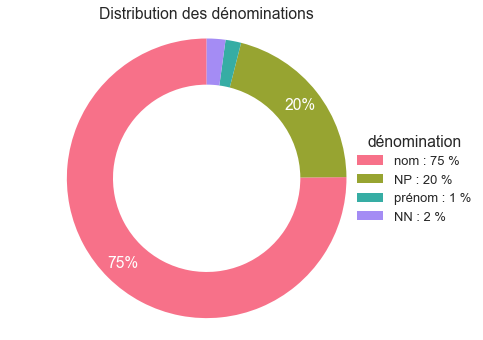

In [818]:
dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][[u"dénomination"]].apply(np.sum)
dfJoueurs=dfJoueurs.append(dfAX.T)
donut(dfAX,u"dénomination",None,u"nom NP prénom NN".split(" "),u"Distribution des dénominations",
     pctMin=2)


# Dénominations par type de tour (PxP vs colour)
- à séparer par speaker dans un donut intérieur

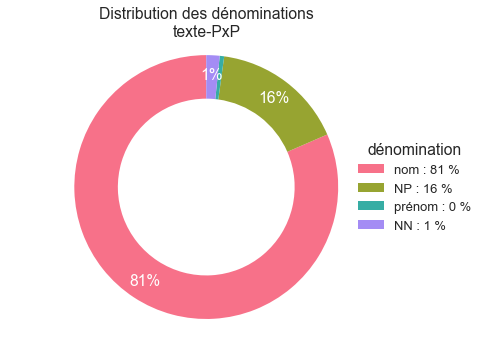

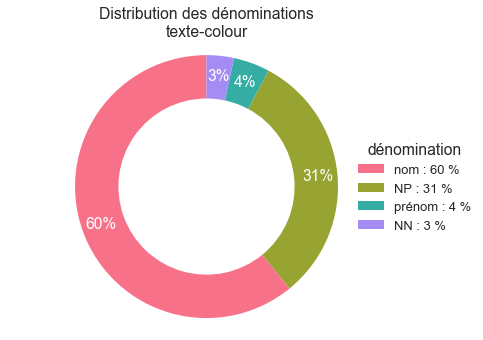

In [819]:
listeAX=[]
for tour in ["texte-PxP","texte-colour"]:
    dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[tour].notnull())][[u"dénomination"]].apply(np.sum)
    listeAX.append(dfAX[u"dénomination"].tolist())
    donut(dfAX,u"dénomination",None,u"nom NP prénom NN".split(" "),u"Distribution des dénominations\n"+tour,pctMin=1)

# Donuts enchassés

In [820]:
def preparerSubWedges(listeAX):
    if isinstance(listeAX,pd.DataFrame):
        print listeAX
    else:
        lSubWedge=len(listeAX[0])
        lListeAX=len(listeAX)
        subWedges=[]
        for i in range(lSubWedge):
            for j in range(lListeAX):
                subWedges.append(listeAX[j][i])   
        return pd.Series(subWedges)
    
def donuts(dfAX,y,extLabels,intLabels,
           listeSubs,titre,
           prepSub=0,
           extPalette="husl",intPalette="Blues",
           figsize=(4,4),pctMin=0,
           titreIntLegend=None,
           titreExtLegend=None,
          ):
    
    extWedges = dfAX[y]
    if prepSub==0:
        intWedges = preparerSubWedges(listeSubs)
    elif prepSub==1:
        intWedges=sum(listeSubs,[])
#     elif prepSub==2:
#         intWedges=listeSubs
    legendLabels = ["%s %s"%(extL,intL) for extL in extLabels for intL in intLabels ]
    intWedges.columns=legendLabels
    pieSum=extWedges.sum()
    legendValues=(extWedges/pieSum*100)
    
    # Plot
    
    extAX=extWedges.plot(kind="pie", 
                         labels=None,#extLabels, 
                         startangle=90,
#                         frame=True,
                         colors=sns.color_palette(extPalette, len(extLabels)),
                         autopct=lambda p: '%1d%%'%p if round(p) > pctMin else '',
                         pctdistance = 0.86,
                         figsize=figsize,
                         textprops=dict(color="w")
                        )
    extAX.set(ylabel="")
    intAX=intWedges.plot(kind="pie",
                         labels=None,#legendLabels,
                         radius=0.75,
                         startangle=90,
                         colors=sns.color_palette(intPalette, len(intLabels)),
                        )
    intAX.set(ylabel="")

    if legendLabels: 
        legendLabels=['%s : %1d %%' % (l, s) for l, s in zip(extLabels, legendValues)]
    extLegend=extAX.legend(labels=legendLabels,
                           title=titreExtLegend,
                           loc="center",
                          bbox_to_anchor=(0.99, 0.75)
                          )
#     first_legend = extAX.legend(range(4), loc = 1)
#     second_legend = intAX.legend("AB", loc = 2)

    legendLines=[]
    for numCol,col in enumerate(sns.color_palette(intPalette, len(intLabels))):
        legendLines.append(mpatches.Patch(color=col,label=intLabels[numCol]))
    intAX.legend(handles=legendLines,
                 loc="center",
                 title=titreIntLegend,
                 bbox_to_anchor=(0.99, 0.25),
                )
    

   

    centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    fig.gca().add_artist(extLegend)
    
    plt.title(titre,y=1.08)
    plt.axis('equal')
    plt.tight_layout()
    plt.savefig('PC-%s.png'%(formatNomFichier(titre)), dpi=150, bbox_inches="tight")
    plt.show()

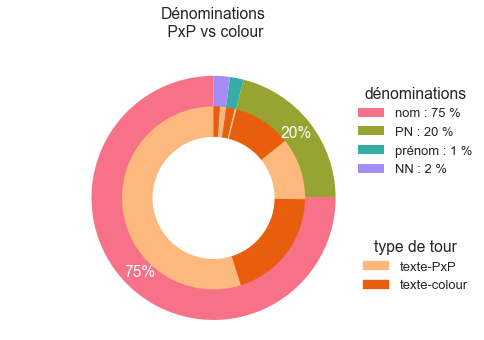

In [821]:
dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][[u"dénomination"]].apply(np.sum)
listeAX=[]
for tour in ["texte-PxP","texte-colour"]:
    dfTour=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[tour].notnull())][[u"dénomination"]].apply(np.sum)
    listeAX.append(dfTour[u"dénomination"].tolist())
donuts(dfAX,u"dénomination",u"nom PN prénom NN".split(" "),["texte-PxP","texte-colour"],
       listeAX,u"Dénominations\n PxP vs colour",
       intPalette="Oranges",
       pctMin=2,
       figsize=(7,5),
       titreExtLegend=u"dénominations",
       titreIntLegend="type de tour",
      )

# Donut des dénominations par joueur
En même temps qu'on dessine les donuts, on alimente un tableau général pour les dénominations des joueurs *dfJoueurs*

In [822]:
#dfJoueurs=pd.DataFrame(columns="prénom nom PN NN".split(" "))
dfJoueurs=pd.DataFrame(columns=range(4))

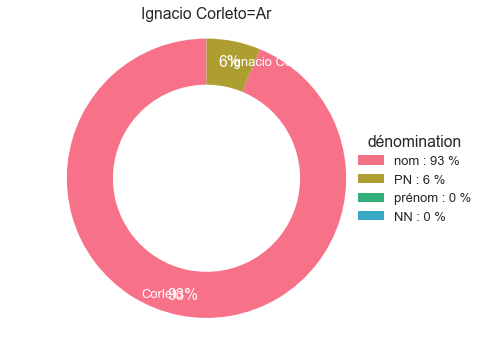

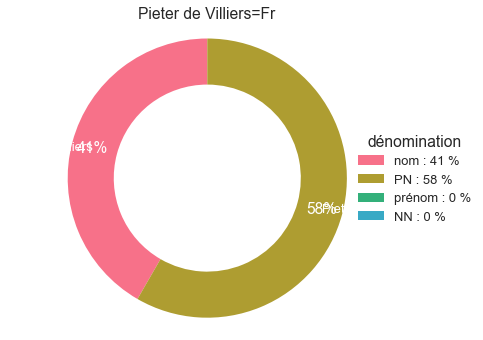

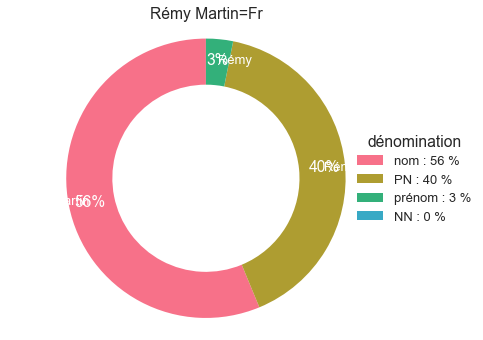

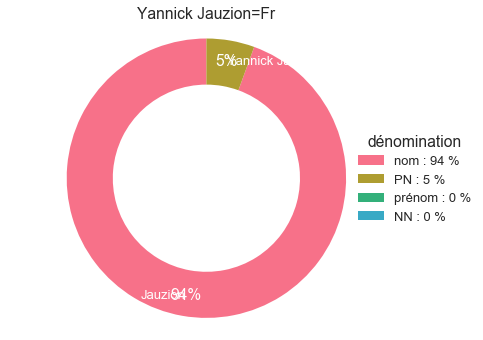

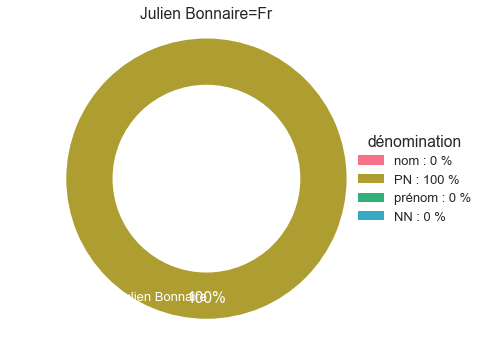

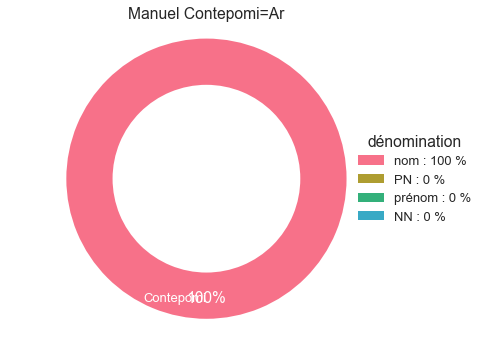

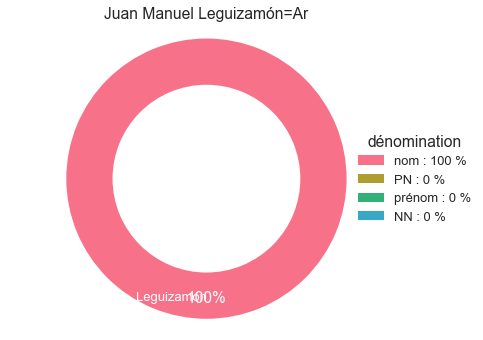

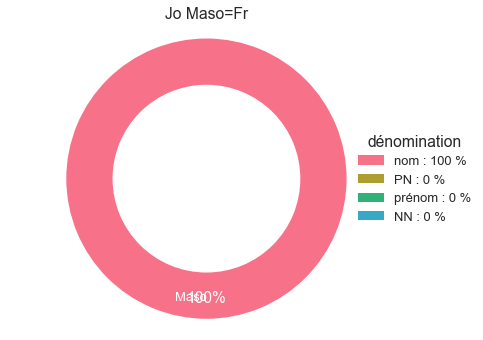

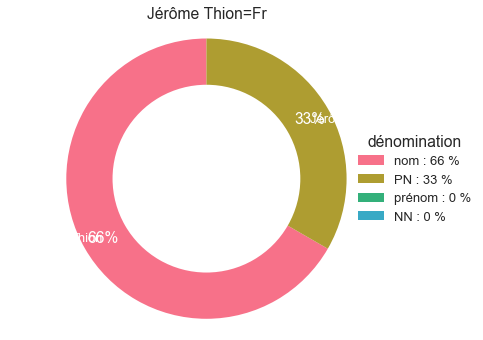

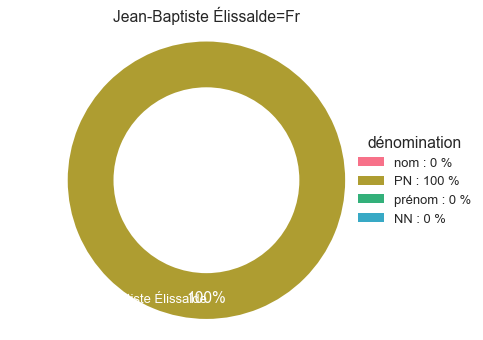

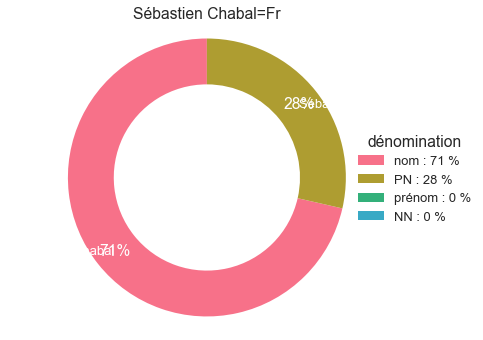

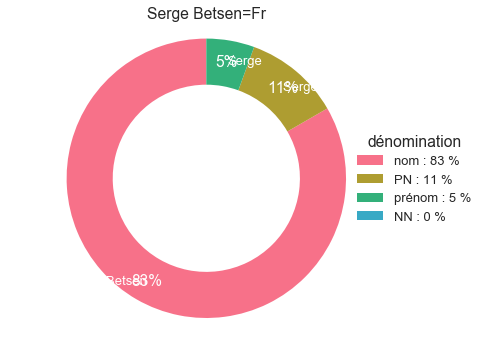

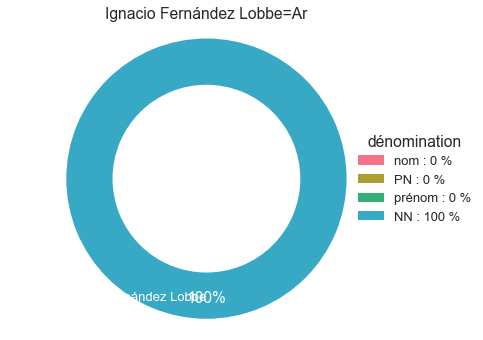

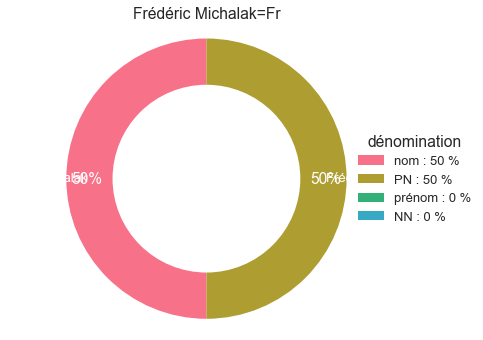

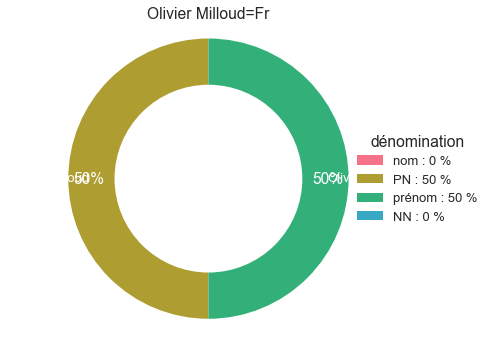

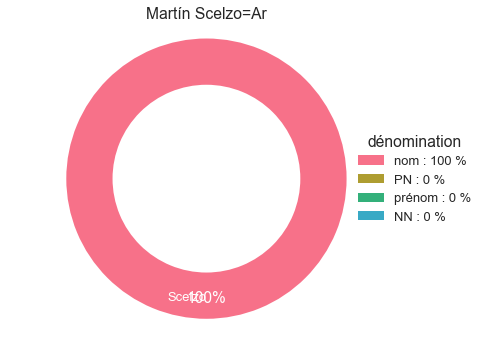

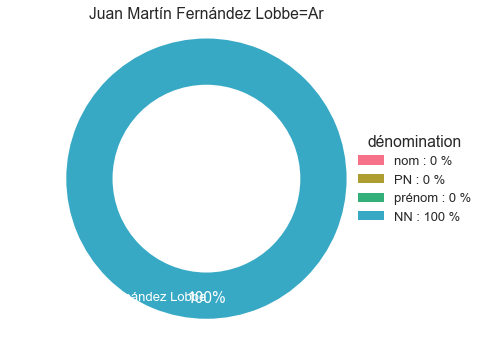

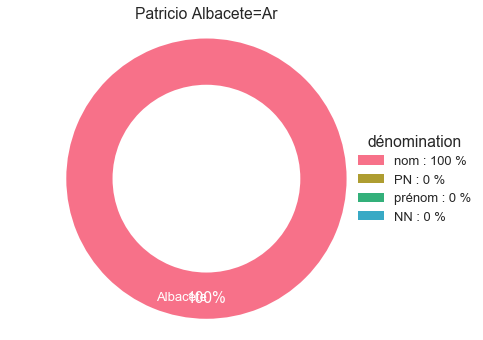

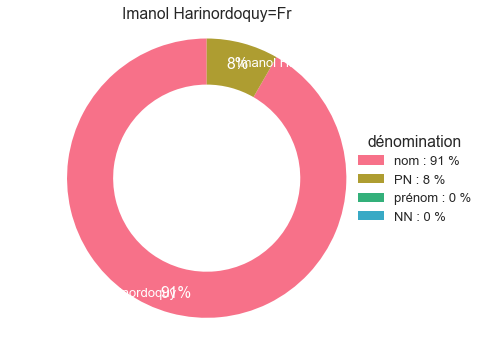

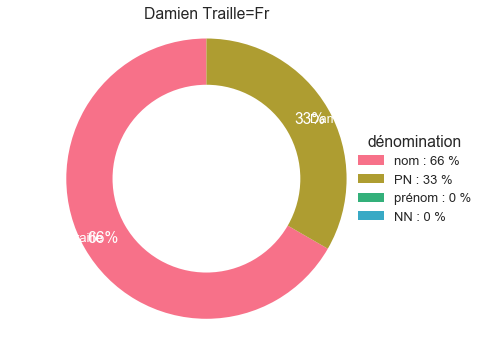

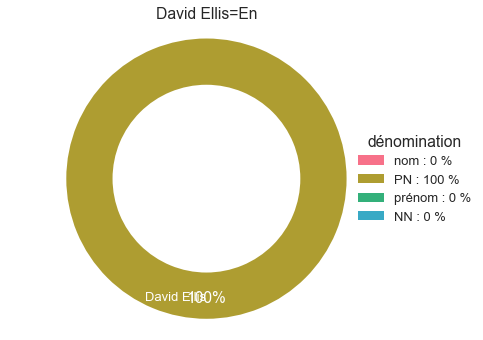

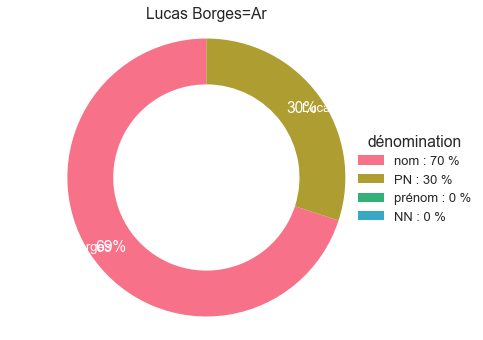

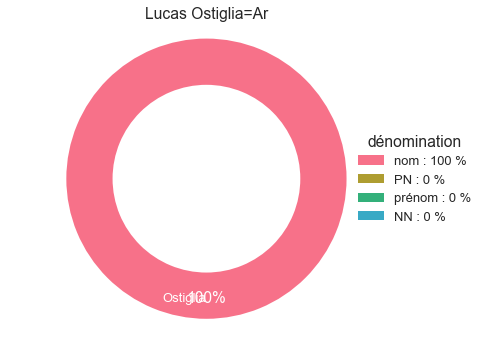

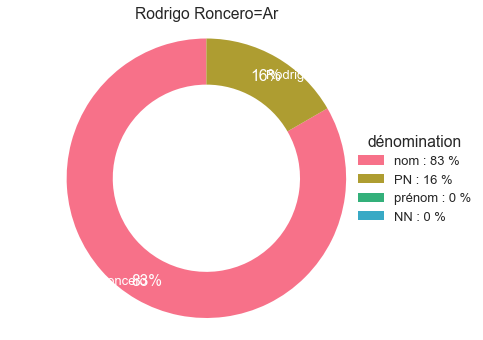

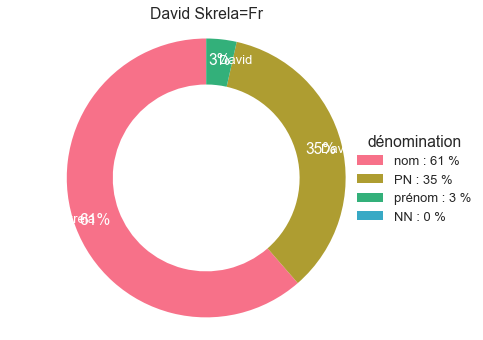

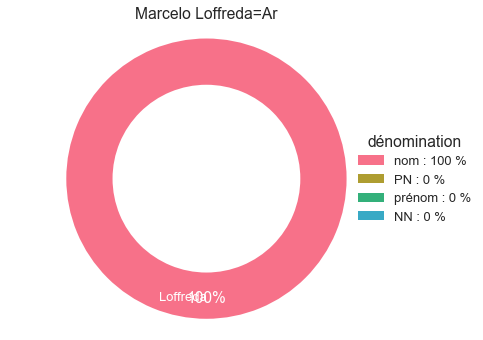

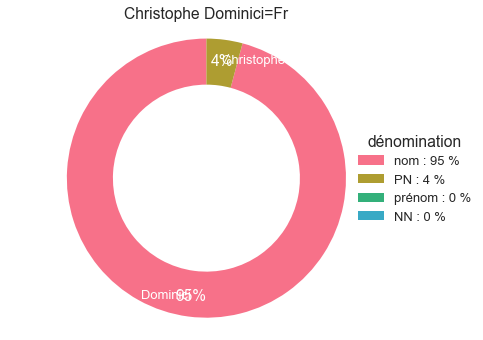

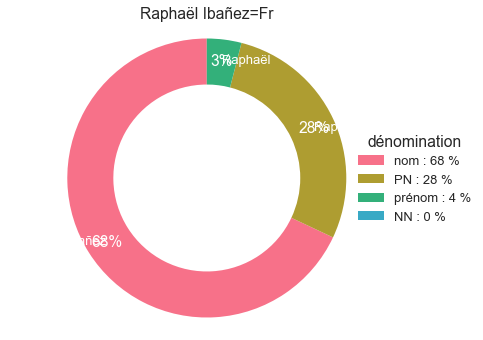

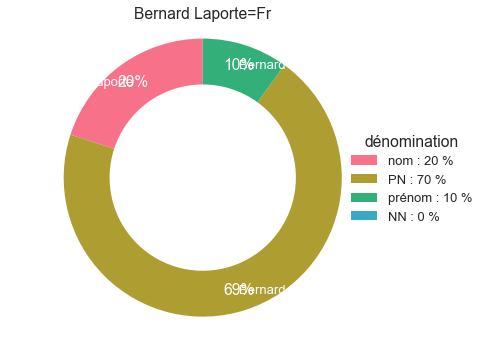

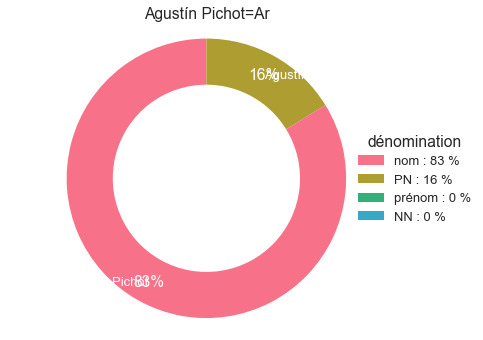

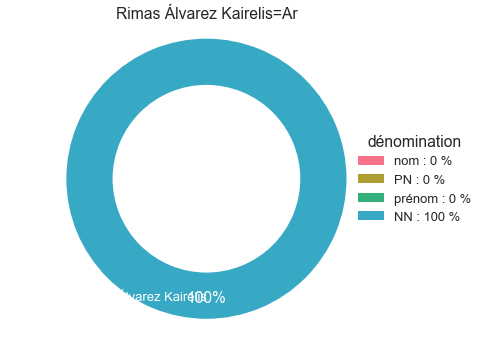

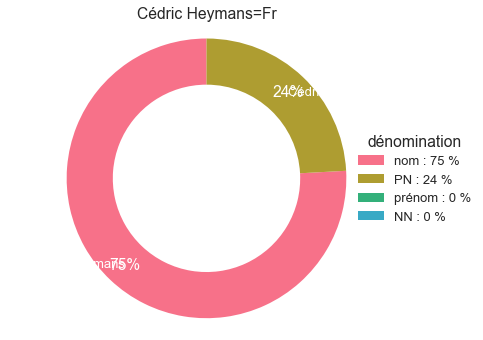

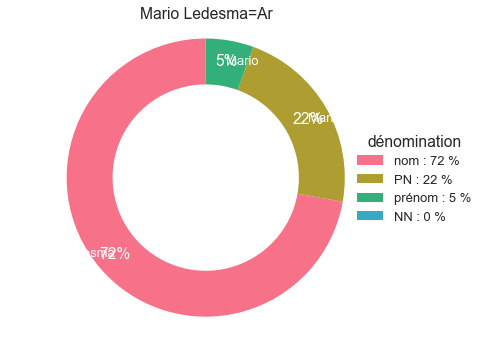

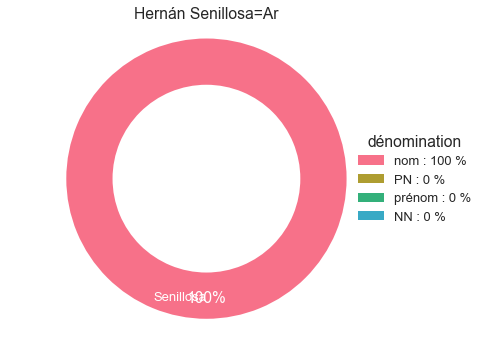

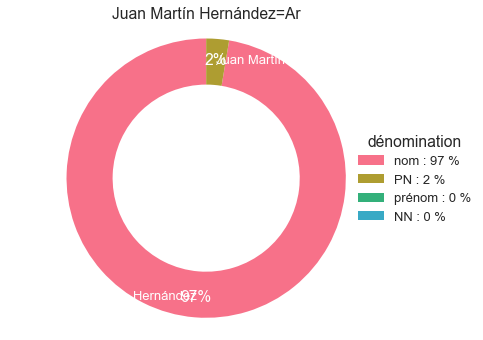

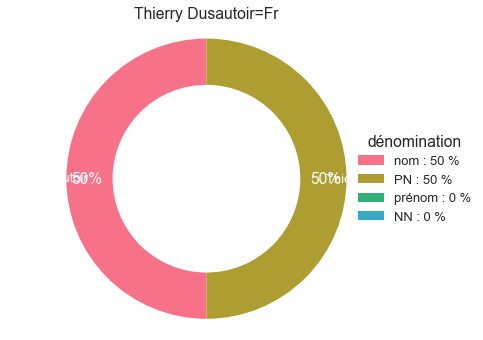

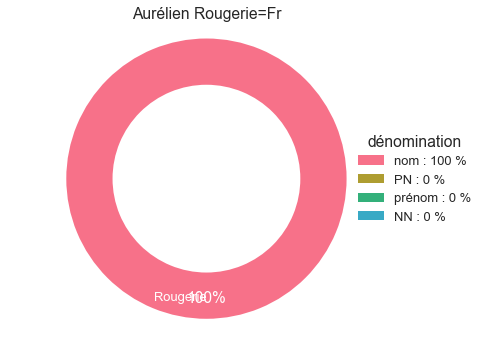

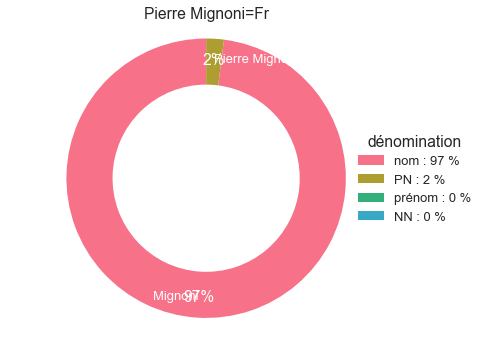

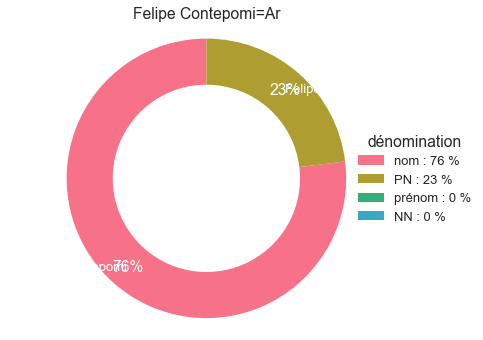

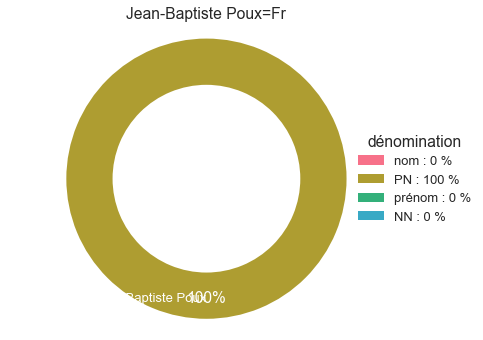

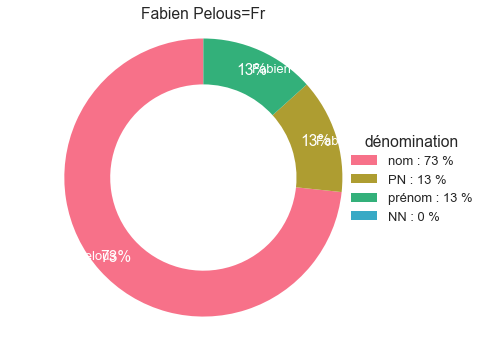

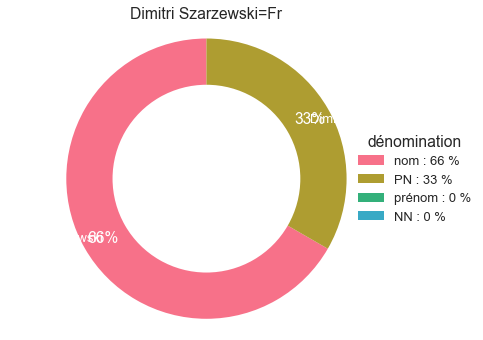

In [823]:
for joueur in joueurDenominations:
    dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][[joueur]].apply(np.sum)
    dfJoueurs=dfJoueurs.append(dfAX.T)
    donut(dfAX,joueur,joueurDenominationsAcc[joueur],u"nom PN prénom NN total".split(" "),joueur)


## Ajout d'une colonne total dans dfJoueurs

In [824]:
dfJoueurs["total"]=dfJoueurs[0]+dfJoueurs[1]+dfJoueurs[2]+dfJoueurs[3]
dfJoueurs

0   1  2  3 total
Ignacio Corleto=Ar              15   1  0  0    16
Pieter de Villiers=Fr            5   7  0  0    12
Rémy Martin=Fr                  18  13  1  0    32
Yannick Jauzion=Fr              17   1  0  0    18
Julien Bonnaire=Fr               0   1  0  0     1
Manuel Contepomi=Ar              2   0  0  0     2
Juan Manuel Leguizamón=Ar        4   0  0  0     4
Jo Maso=Fr                       1   0  0  0     1
Jérôme Thion=Fr                  4   2  0  0     6
Jean-Baptiste Élissalde=Fr       0   1  0  0     1
Sébastien Chabal=Fr             10   4  0  0    14
Serge Betsen=Fr                 15   2  1  0    18
Ignacio Fernández Lobbe=Ar       0   0  0  1     1
Frédéric Michalak=Fr             2   2  0  0     4
Olivier Milloud=Fr               0   1  1  0     2
Martín Scelzo=Ar                 2   0  0  0     2
Juan Martín Fernández Lobbe=Ar   0   0  0  9     9
Patricio Albacete=Ar             1   0  0  0     1
Imanol Harinordoquy=Fr          11   1  0  0    12
Damien Traille=Fr               18   9  0  0    27
David Ellis=En                   0   1  0  0     1
Lucas Borges=Ar                  7   3  0  0    10
Lucas Ostiglia=Ar                3   0  0  0     3
Rodrigo Roncero=Ar               5   1  0  0     6
David Skrela=Fr                 35  20  2  0    57
Marcelo Loffreda=Ar              1   0  0  0     1
Christophe Dominici=Fr          23   1  0  0    24
Raphaël Ibañez=Fr               17   7  1  0    25
Bernard Laporte=Fr               2   7  1  0    10
Agustín Pichot=Ar               31   6  0  0    37
Rimas Álvarez Kairelis=Ar        0   0  0  2     2
Cédric Heymans=Fr               22   7  0  0    29
Mario Ledesma=Ar                13   4  1  0    18
Hernán Senillosa=Ar              3   0  0  0     3
Juan Martín Hernández=Ar        37   1  0  0    38
Thierry Dusautoir=Fr             1   1  0  0     2
Aurélien Rougerie=Fr             9   0  0  0     9
Pierre Mignoni=Fr               48   1  0  0    49
Felipe Contepomi=Ar             20   6  0  0    26
Jean-Baptiste Poux=Fr            0   1  0  0     1
Fabien Pelous=Fr                11   2  2  0    15
Dimitri Szarzewski=Fr            4   2  0  0     6

In [825]:
dfJoueurs.columns=u"nom PN prénom NN total".split(" ")
dfJoueurs

nom  PN prénom NN total
Ignacio Corleto=Ar              15   1      0  0    16
Pieter de Villiers=Fr            5   7      0  0    12
Rémy Martin=Fr                  18  13      1  0    32
Yannick Jauzion=Fr              17   1      0  0    18
Julien Bonnaire=Fr               0   1      0  0     1
Manuel Contepomi=Ar              2   0      0  0     2
Juan Manuel Leguizamón=Ar        4   0      0  0     4
Jo Maso=Fr                       1   0      0  0     1
Jérôme Thion=Fr                  4   2      0  0     6
Jean-Baptiste Élissalde=Fr       0   1      0  0     1
Sébastien Chabal=Fr             10   4      0  0    14
Serge Betsen=Fr                 15   2      1  0    18
Ignacio Fernández Lobbe=Ar       0   0      0  1     1
Frédéric Michalak=Fr             2   2      0  0     4
Olivier Milloud=Fr               0   1      1  0     2
Martín Scelzo=Ar                 2   0      0  0     2
Juan Martín Fernández Lobbe=Ar   0   0      0  9     9
Patricio Albacete=Ar             1   0      0  0     1
Imanol Harinordoquy=Fr          11   1      0  0    12
Damien Traille=Fr               18   9      0  0    27
David Ellis=En                   0   1      0  0     1
Lucas Borges=Ar                  7   3      0  0    10
Lucas Ostiglia=Ar                3   0      0  0     3
Rodrigo Roncero=Ar               5   1      0  0     6
David Skrela=Fr                 35  20      2  0    57
Marcelo Loffreda=Ar              1   0      0  0     1
Christophe Dominici=Fr          23   1      0  0    24
Raphaël Ibañez=Fr               17   7      1  0    25
Bernard Laporte=Fr               2   7      1  0    10
Agustín Pichot=Ar               31   6      0  0    37
Rimas Álvarez Kairelis=Ar        0   0      0  2     2
Cédric Heymans=Fr               22   7      0  0    29
Mario Ledesma=Ar                13   4      1  0    18
Hernán Senillosa=Ar              3   0      0  0     3
Juan Martín Hernández=Ar        37   1      0  0    38
Thierry Dusautoir=Fr             1   1      0  0     2
Aurélien Rougerie=Fr             9   0      0  0     9
Pierre Mignoni=Fr               48   1      0  0    49
Felipe Contepomi=Ar             20   6      0  0    26
Jean-Baptiste Poux=Fr            0   1      0  0     1
Fabien Pelous=Fr                11   2      2  0    15
Dimitri Szarzewski=Fr            4   2      0  0     6

## Ajout de colonnes pourcentages dans dfJoueurs

In [826]:
dfJoueurs[u"pPrénom"]=dfJoueurs[u"prénom"].astype(float)/dfJoueurs[u"total"]
dfJoueurs[u"pNom"]=dfJoueurs[u"nom"].astype(float)/dfJoueurs[u"total"]
dfJoueurs[u"pPN"]=dfJoueurs[u"PN"].astype(float)/dfJoueurs[u"total"]
dfJoueurs[u"pNN"]=dfJoueurs[u"NN"].astype(float)/dfJoueurs[u"total"]

# Donuts des dénominations général puis par speaker
Décliner les donuts par plage de RJ et par tour (PxP vs colour)

In [827]:
dfSpkJoueurs={}
for spk in spkNoms:
    print spk
    dfSpkJoueurs[spk]=pd.DataFrame(columns=range(4))
    for joueur in joueurDenominations:
        print joueur
        dfAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch["Spk"]==spk)][[joueur]].apply(np.sum)
        dfSpkJoueurs[spk]=dfSpkJoueurs[spk].append(dfAX.T)
    dfSpkJoueurs[spk]["total"]=dfSpkJoueurs[spk][0]+dfSpkJoueurs[spk][1]+dfSpkJoueurs[spk][2]+dfSpkJoueurs[spk][3]
    dfSpkJoueurs[spk].columns=u"nom PN prénom NN total".split(" ")

spk1
Ignacio Corleto=Ar
Pieter de Villiers=Fr
Rémy Martin=Fr
Yannick Jauzion=Fr
Julien Bonnaire=Fr
Manuel Contepomi=Ar
Juan Manuel Leguizamón=Ar
Jo Maso=Fr
Jérôme Thion=Fr
Jean-Baptiste Élissalde=Fr
Sébastien Chabal=Fr
Serge Betsen=Fr
Ignacio Fernández Lobbe=Ar
Frédéric Michalak=Fr
Olivier Milloud=Fr
Martín Scelzo=Ar
Juan Martín Fernández Lobbe=Ar
Patricio Albacete=Ar
Imanol Harinordoquy=Fr
Damien Traille=Fr
David Ellis=En
Lucas Borges=Ar
Lucas Ostiglia=Ar
Rodrigo Roncero=Ar
David Skrela=Fr
Marcelo Loffreda=Ar
Christophe Dominici=Fr
Raphaël Ibañez=Fr
Bernard Laporte=Fr
Agustín Pichot=Ar
Rimas Álvarez Kairelis=Ar
Cédric Heymans=Fr
Mario Ledesma=Ar
Hernán Senillosa=Ar
Juan Martín Hernández=Ar
Thierry Dusautoir=Fr
Aurélien Rougerie=Fr
Pierre Mignoni=Fr
Felipe Contepomi=Ar
Jean-Baptiste Poux=Fr
Fabien Pelous=Fr
Dimitri Szarzewski=Fr
spk2
Ignacio Corleto=Ar
Pieter de Villiers=Fr
Rémy Martin=Fr
Yannick Jauzion=Fr
Julien Bonnaire=Fr
Manuel Contepomi=Ar
Juan Manuel Leguizamón=Ar
Jo Maso=Fr
Jér

In [828]:
sum([[1,2,3],[1,2,3],[1,2,3]],[])

[1, 2, 3, 1, 2, 3, 1, 2, 3]

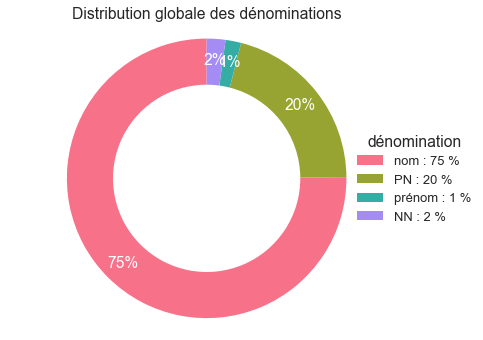

In [829]:
dfAX=dfJoueurs[u"nom PN prénom NN".split(" ")].sum()
donut(dfAX,None,None,u"nom PN prénom NN".split(" "),u"Distribution globale des dénominations")

In [830]:
dfSpkJoueurs

{'spk1':                                nom  PN prénom NN total
 Ignacio Corleto=Ar              12   1      0  0    13
 Pieter de Villiers=Fr            5   4      0  0     9
 Rémy Martin=Fr                  13   8      0  0    21
 Yannick Jauzion=Fr              14   1      0  0    15
 Julien Bonnaire=Fr               0   0      0  0     0
 Manuel Contepomi=Ar              2   0      0  0     2
 Juan Manuel Leguizamón=Ar        4   0      0  0     4
 Jo Maso=Fr                       1   0      0  0     1
 Jérôme Thion=Fr                  2   2      0  0     4
 Jean-Baptiste Élissalde=Fr       0   1      0  0     1
 Sébastien Chabal=Fr              7   1      0  0     8
 Serge Betsen=Fr                 10   1      1  0    12
 Ignacio Fernández Lobbe=Ar       0   0      0  1     1
 Frédéric Michalak=Fr             2   1      0  0     3
 Olivier Milloud=Fr               0   0      1  0     1
 Martín Scelzo=Ar                 1   0      0  0     1
 Juan Martín Fernández Lobbe=Ar   0   0 

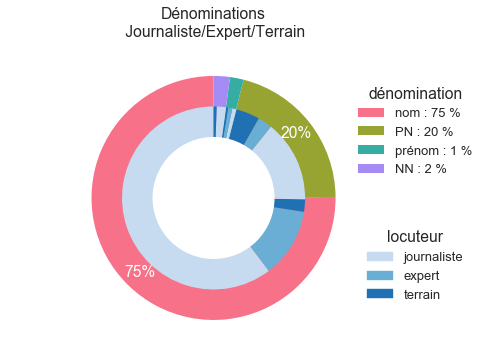

In [872]:
dfAX=pd.DataFrame(dfJoueurs[u"nom PN prénom NN".split(" ")].sum())
listeAX=[]
for spk in spkNoms:
    listeAX.append(dfSpkJoueurs[spk][u"nom PN prénom NN".split(" ")].sum().tolist())
donuts(dfAX,0,u"nom PN prénom NN".split(" "),spkNoms.values(),
       listeAX,u"Dénominations\n Journaliste/Expert/Terrain",
       figsize=(7,5),
       pctMin=2,
       titreExtLegend=u"dénomination",
       titreIntLegend="locuteur",
      )




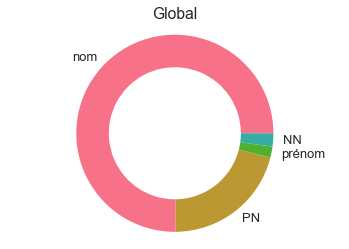

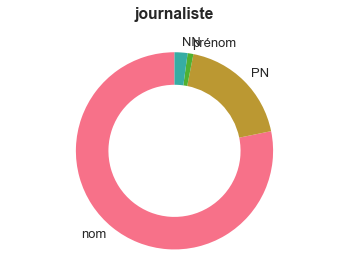

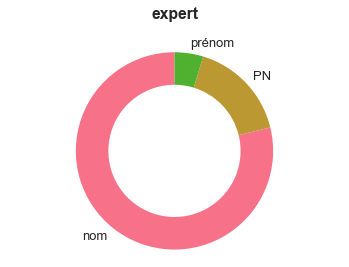

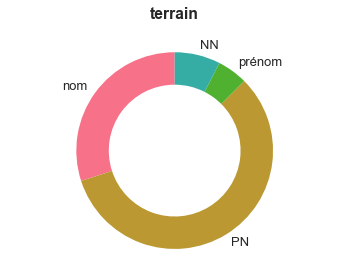

In [873]:
title=u"Dénominations-Global"
ax=dfJoueurs[u"nom PN prénom NN".split(" ")].sum().plot("pie",
                                                        wedgeprops=dict(width=0.33),
                                                        title="Global")
ax.axis('equal')
ax.set(ylabel="")
plt.savefig('PC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

for spk in spkNoms:
    ax=dfSpkJoueurs[spk][u"nom PN prénom NN".split(" ")].sum().plot("pie",
                                                                    wedgeprops=dict(width=0.33),
#                                                                    autopct=lambda p: '%1d%%'%round(p) if round(p) > 0 else '',
#                                                                    pctdistance = 0.85,
                                                                    startangle=90,
                                                                    )
    ax.axis('equal')
    ax.set(ylabel="")
    plt.title(spkNoms[spk],y=1.08,fontweight="bold")
    title=u"Dénominations-%s"%spkNoms[spk]
    plt.savefig('PC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
    plt.show()

In [874]:
dfSpkJoueurs

{'spk1':                                nom  PN prénom NN total
 Ignacio Corleto=Ar              12   1      0  0    13
 Pieter de Villiers=Fr            5   4      0  0     9
 Rémy Martin=Fr                  13   8      0  0    21
 Yannick Jauzion=Fr              14   1      0  0    15
 Julien Bonnaire=Fr               0   0      0  0     0
 Manuel Contepomi=Ar              2   0      0  0     2
 Juan Manuel Leguizamón=Ar        4   0      0  0     4
 Jo Maso=Fr                       1   0      0  0     1
 Jérôme Thion=Fr                  2   2      0  0     4
 Jean-Baptiste Élissalde=Fr       0   1      0  0     1
 Sébastien Chabal=Fr              7   1      0  0     8
 Serge Betsen=Fr                 10   1      1  0    12
 Ignacio Fernández Lobbe=Ar       0   0      0  1     1
 Frédéric Michalak=Fr             2   1      0  0     3
 Olivier Milloud=Fr               0   0      1  0     1
 Martín Scelzo=Ar                 1   0      0  0     1
 Juan Martín Fernández Lobbe=Ar   0   0 

# Distribution des dénominations par joueurs (stacked bars)

## global trié par nombre de dénominations

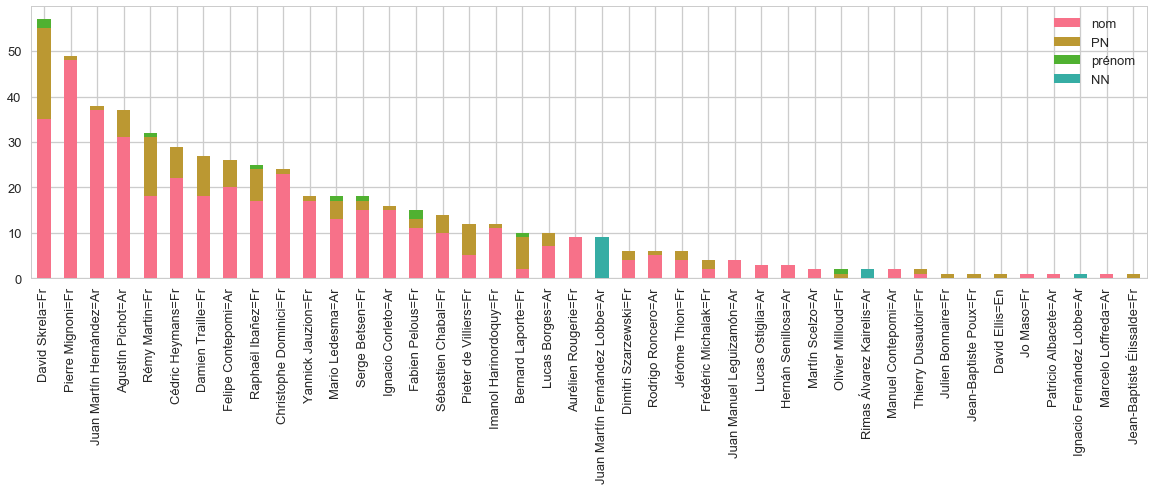

In [875]:
title=u"DistributionDénominationsJoueurs"
ax=dfJoueurs.sort_values("total",ascending=False).iloc[:][["nom","PN",u"prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

## 20 plus fréquents

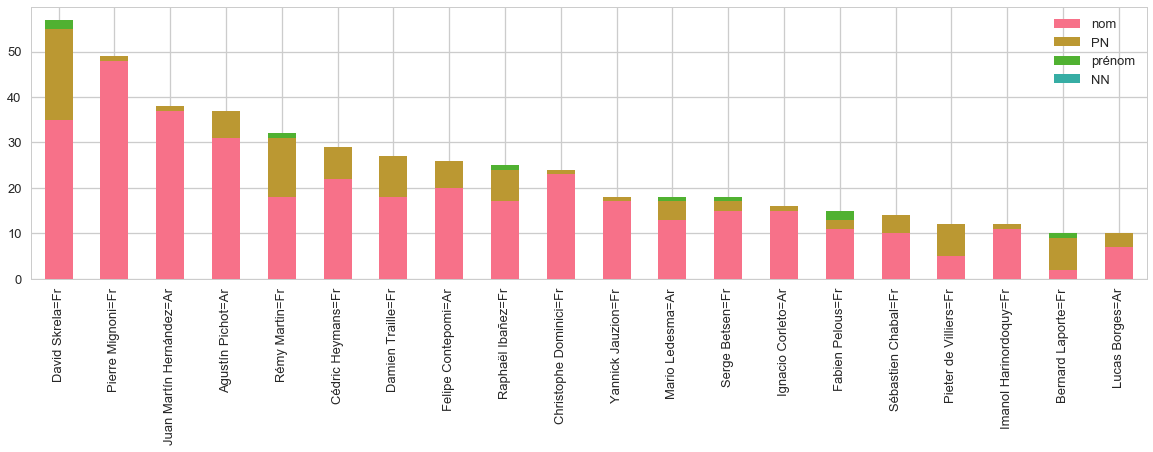

In [876]:
title=u"DistributionDénominationsJoueurs-20Premiers"
dfJoueurs.sort_values("total",ascending=False).iloc[:20][["nom","PN",u"prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

## queue de la distribution

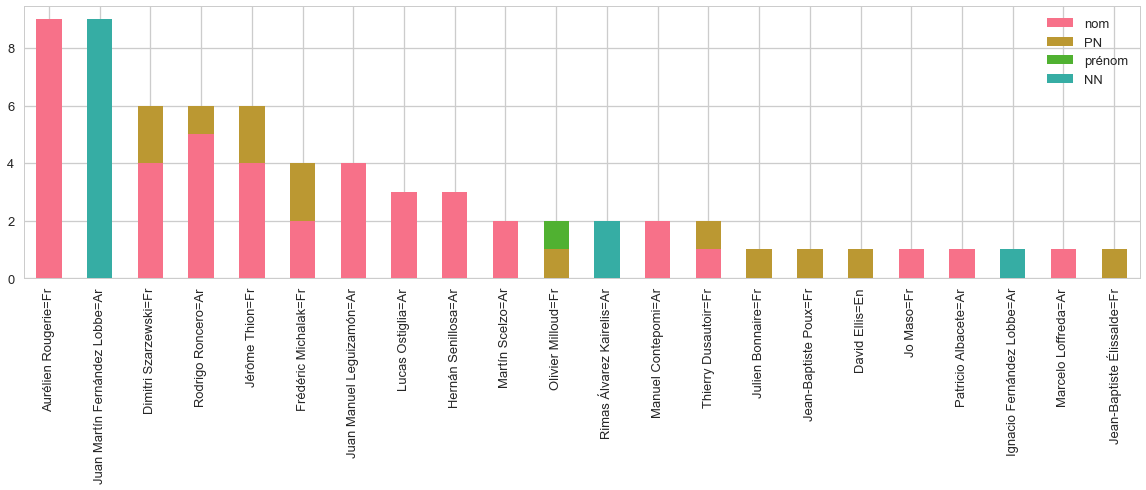

In [877]:
title=u"DistributionDénominationsJoueurs-Derniers"
dfJoueurs.sort_values("total",ascending=False).iloc[20:][["nom","PN",u"prénom","NN"]].plot(kind="bar",stacked=True, figsize=(20,5))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

## Pourcentages des dénominations par joueurs

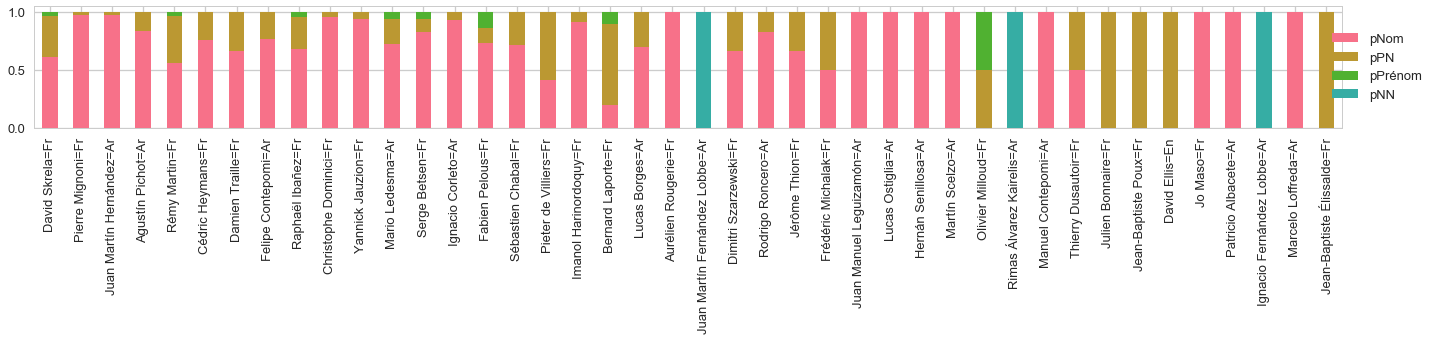

In [878]:
title=u"DistributionDénominationsJoueurs-Pourcentages"
dfAX=dfJoueurs.sort_values("total",ascending=False).iloc[:][["pNom","pPN",u"pPrénom","pNN"]]
ax=dfAX.plot(kind="bar",stacked=True, figsize=(20,5))
ax.legend(loc="right",bbox_to_anchor=(1.07, 0.5))
plt.tight_layout()
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

## Dénominations des joueurs par speaker

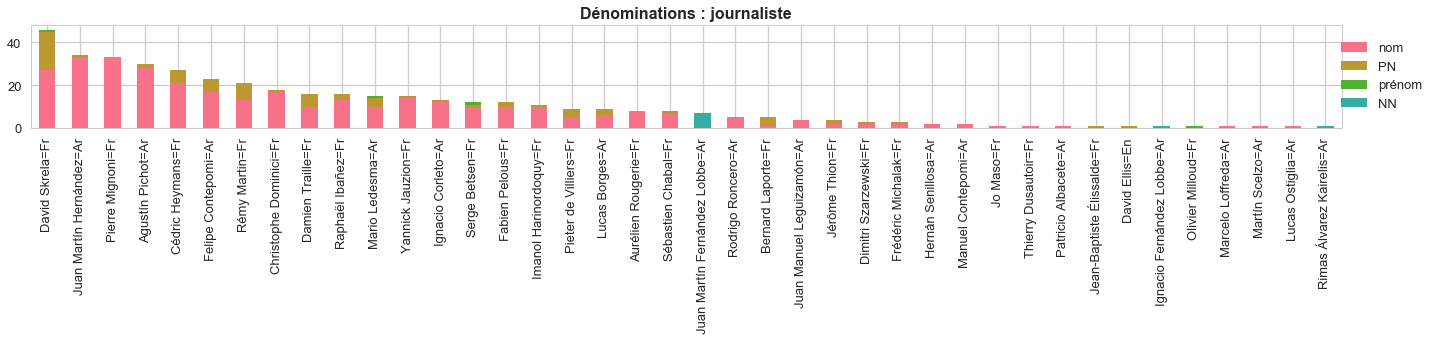

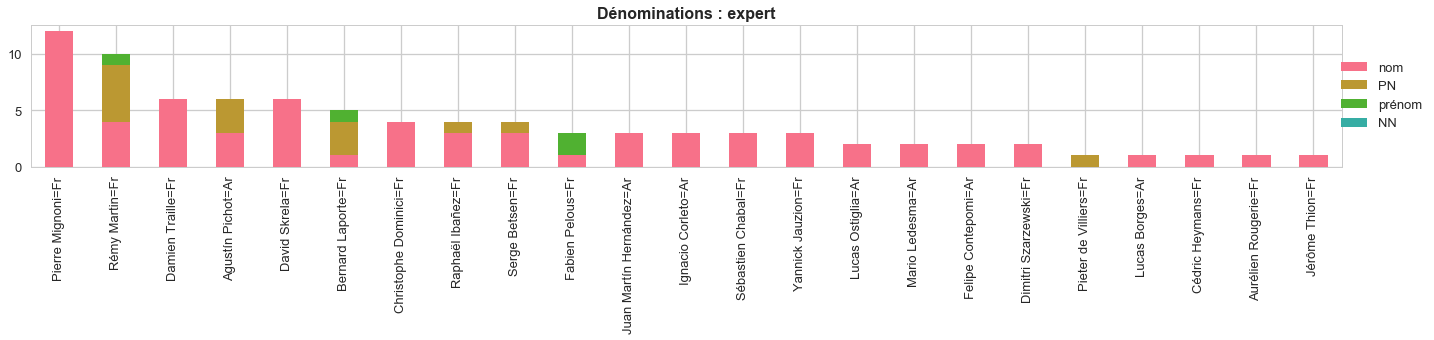

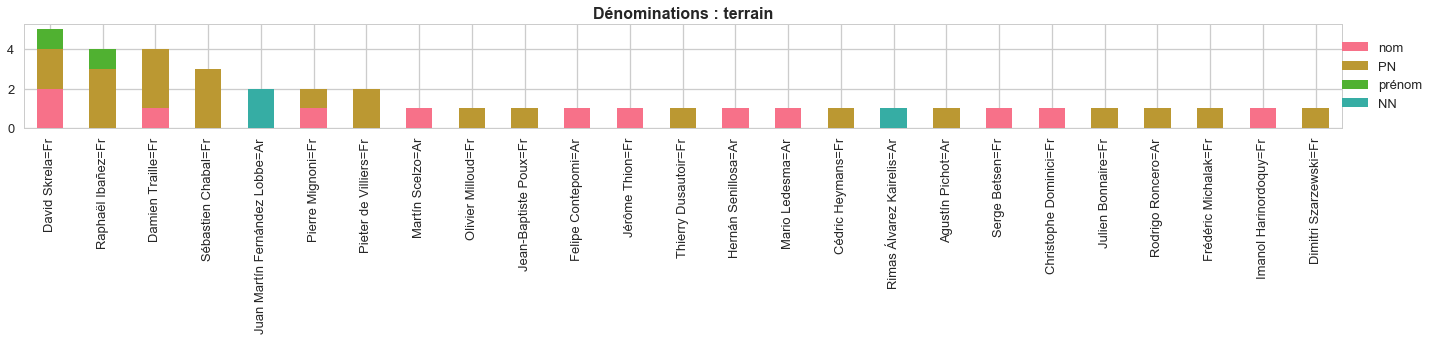

In [879]:
for spk in spkNoms:
    dfAX=dfSpkJoueurs[spk][dfSpkJoueurs[spk]["total"]>0].sort_values("total",ascending=False).iloc[:][["nom","PN",u"prénom","NN"]]
    ax=dfAX.plot(kind="bar",
                 stacked=True, 
                 figsize=(20,5),
                 )
    ax.legend(loc="right",bbox_to_anchor=(1.07, 0.5))
    plt.title(u"Dénominations : %s"%spkNoms[spk],
              fontweight="bold",
              fontsize=16,
             )
    plt.tight_layout()
    plt.show()
    

# Faire des donuts pour les dénominations
- distribution des dénominations par type de tour
- distribution des dénominations par plage de RJ5.00

# Faire des stacked bars
- distribution des dénominations en séparant les types de tours

# Distribution des dénominations par RJ

In [880]:
listeAX=[]
for denom in u"nom PN prénom NN".split(" "):
    dictAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[denom]!=0)][["RJ5",denom]].groupby("RJ5").count()[denom].to_dict()
    seriesAX=[]
    for i in range(len(rythmeCuts)):
        if i in dictAX:
            seriesAX.append(dictAX[i])
        else:
            seriesAX.append(0)
    listeAX.append(seriesAX)
listeAX
subAX=pd.DataFrame(listeAX)
subAX.index=u"nom PN prénom NN".split(" ")
subAX.columns=["%d"%r for r in rythmeCuts]
subAX

0   1   2   3   4   5  6  7  8
nom     148  44  54  52  43  34  6  2  0
PN       55  15  15  10   6   5  0  1  0
prénom    6   0   0   0   2   2  0  0  0
NN        6   0   2   0   3   0  0  0  0

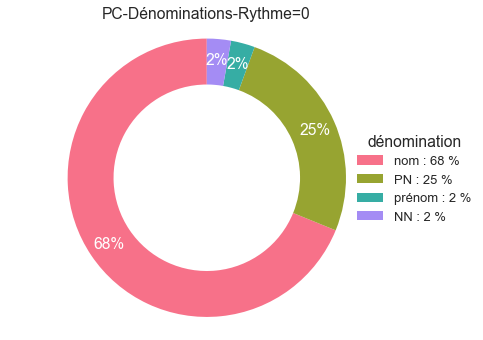

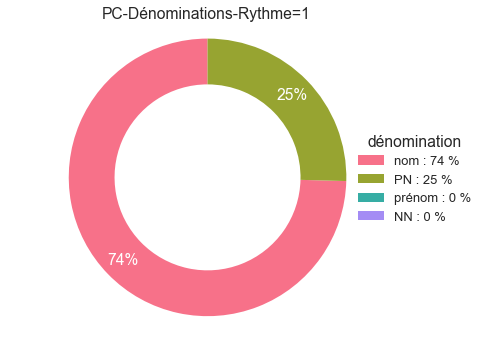

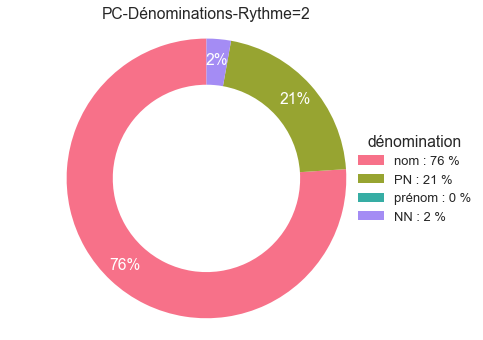

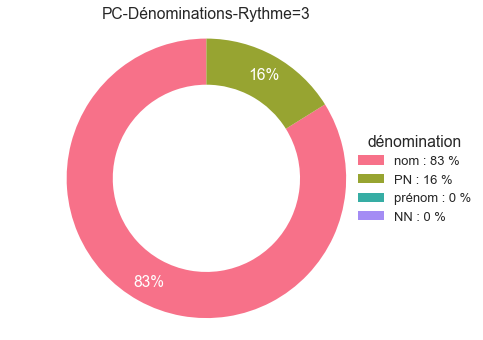

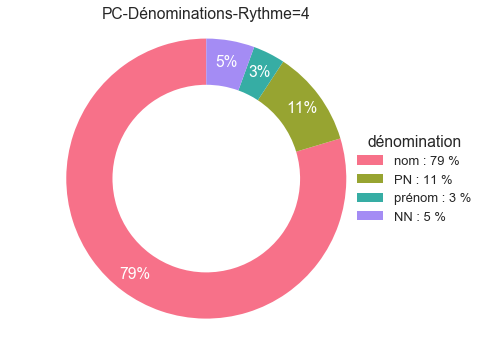

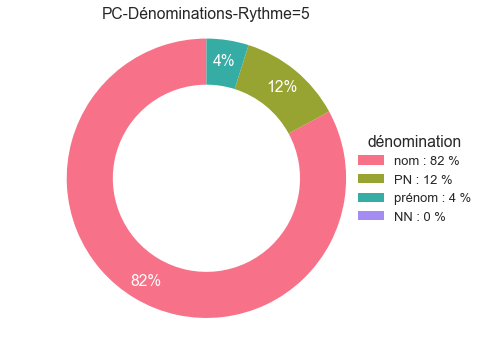

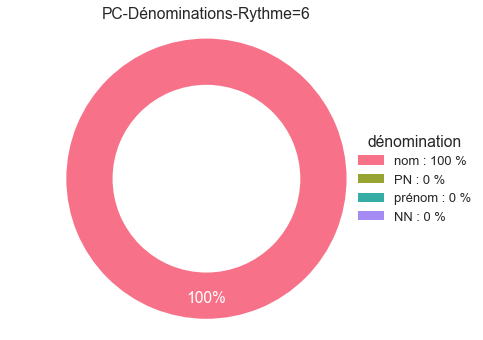

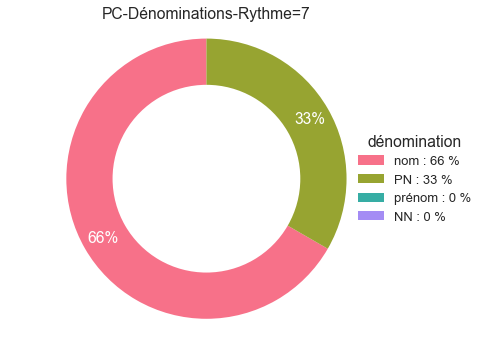

In [881]:
for rythme in subAX.columns:
    if subAX[rythme].sum()>0:
        donut(subAX,rythme,None,u"nom PN prénom NN".split(" "),u"PC-Dénominations-Rythme="+rythme)

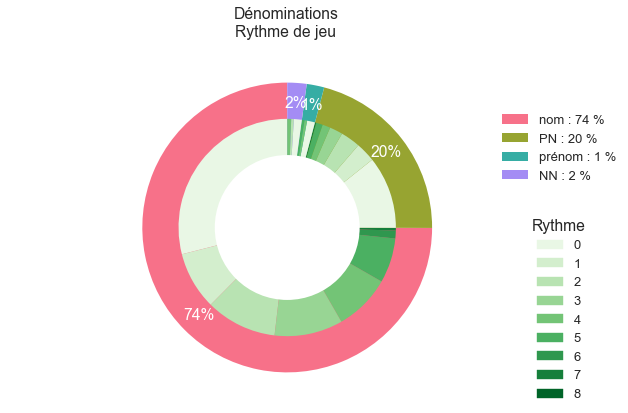

In [882]:
subWedges=[r.tolist() for ix,r in subAX.T.iterrows()]
dfAX=pd.DataFrame(subAX.T[u"nom PN prénom NN".split(" ")].sum())
donuts(dfAX,0,u"nom PN prénom NN".split(" "),
       rythmeCuts,subWedges,
       u"Dénominations\nRythme de jeu",prepSub=0,
       intPalette="Greens",
       figsize=(9,6),
       titreIntLegend="Rythme",
      )

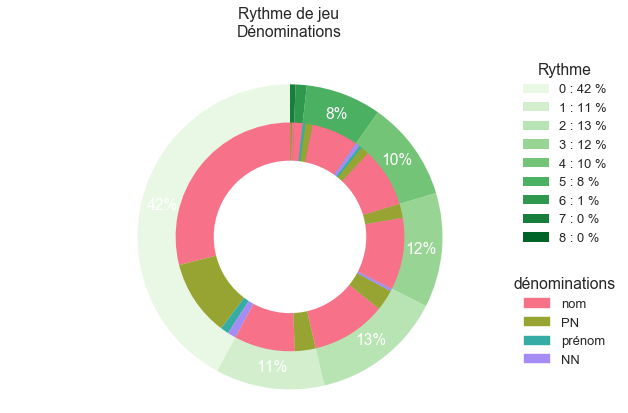

In [883]:
dfAX=pd.DataFrame(subAX.sum())
subWedges=[r.tolist() for ix,r in subAX.iterrows()]
donuts(dfAX,0,rythmeCuts,u"nom PN prénom NN".split(" "),
       subWedges,u"Rythme de jeu\nDénominations",prepSub=0,
       intPalette="husl",
       extPalette="Greens",
       titreIntLegend=u"dénominations",
       figsize=(9,6),
       titreExtLegend=u"Rythme",
       pctMin=1,
      )

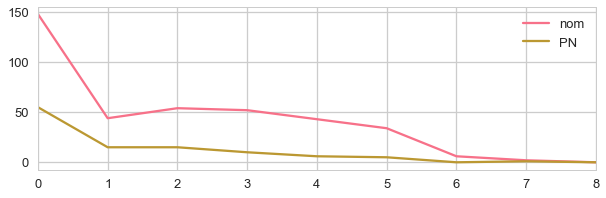

In [884]:
subAX.T[["nom","PN"]].plot(figsize=(10,3))
plt.savefig(u"LC-Dénominations-RythmeJeu", dpi=150, bbox_inches="tight")

# Distribution des dénominations par Excitation

In [885]:
listeAX=[]
for denom in u"nom PN prénom NN".split(" "):
    dictAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[denom]!=0)][["Exc2",denom]].groupby("Exc2").count()[denom].to_dict()
    seriesAX=[]
    for i in range(len(excitationCuts)):
        if i in dictAX and dictAX[i]>0:
            seriesAX.append(dictAX[i])
        else:
            seriesAX.append(0)
    listeAX.append(seriesAX)
listeAX
subAX=pd.DataFrame(listeAX)
subAX.index=u"nom PN prénom NN".split(" ")
subAX.columns=["%d"%r for r in range(1,len(excitationCuts)+1)]
subAX

1    2   3
nom     81  279  23
PN      33   70   5
prénom   4    6   0
NN       0   11   0

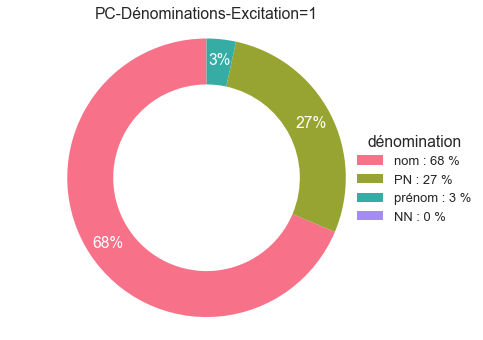

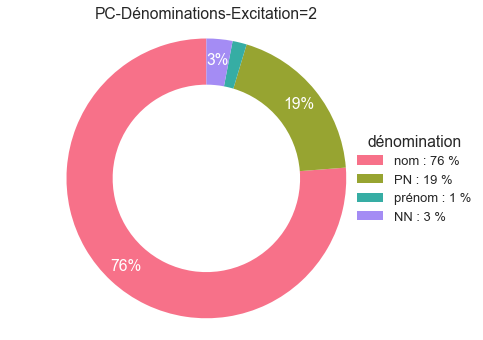

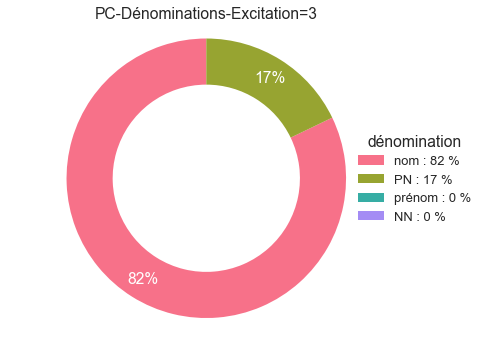

In [886]:
for excitation in subAX.columns:
    if subAX[excitation].sum()>0:
        donut(subAX,excitation,None,u"nom PN prénom NN".split(" "),
              u"PC-Dénominations-Excitation="+excitation,
              pctMin=2,
             )

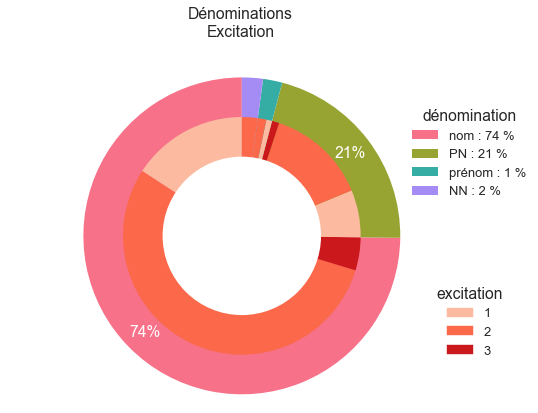

In [893]:
subWedges=[r.tolist() for ix,r in subAX.T.iterrows()]
dfAX=pd.DataFrame(subAX.T[u"nom PN prénom NN".split(" ")].sum())
donuts(dfAX,0,u"nom PN prénom NN".split(" "),
       excitationCuts,subWedges,
       u"Dénominations\nExcitation",prepSub=0,
       intPalette="Reds",
       figsize=(7.75,6),
       titreIntLegend="excitation",
       titreExtLegend=u"dénomination",
       pctMin=2,
      )

In [894]:
subAX

1    2   3
nom     81  279  23
PN      33   70   5
prénom   4    6   0
NN       0   11   0

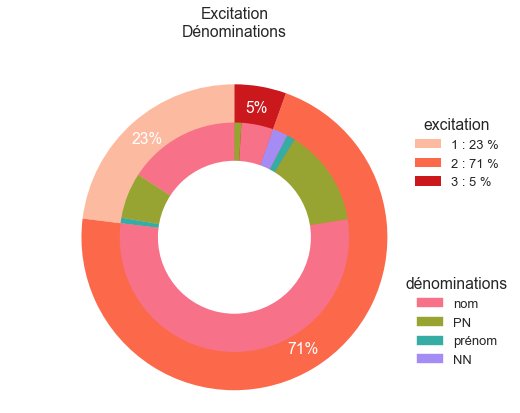

In [895]:
dfAX=pd.DataFrame(subAX.sum())
subWedges=[r.tolist() for ix,r in subAX.iterrows()]
donuts(dfAX,0,excitationCuts,u"nom PN prénom NN".split(" "),
       subWedges,u"Excitation\nDénominations",prepSub=0,
       intPalette="husl",
       extPalette="Reds",
       titreIntLegend=u"dénominations",
       figsize=(7.5,6),
       titreExtLegend=u"excitation",
       pctMin=1,
      )

In [896]:
subAXT=subAX.T
subAXT["PN/(nom+PN)"]=subAXT["PN"]/(subAXT["nom"]+subAXT["PN"])
subAXT

nom  PN  prénom  NN  PN/(nom+PN)
1   81  33       4   0     0.289474
2  279  70       6  11     0.200573
3   23   5       0   0     0.178571

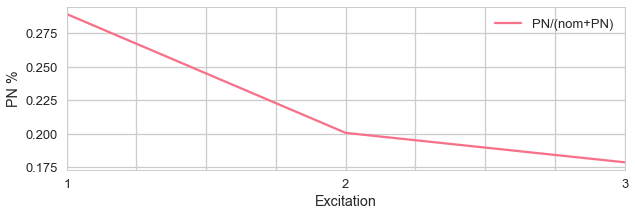

In [897]:
ax=subAXT[["PN/(nom+PN)"]].plot(figsize=(10,3),)
ax.set_ylabel(u"PN %")
ax.set_xlabel(u"Excitation")
plt.savefig(u"LC-PN-Excitation", dpi=150, bbox_inches="tight")

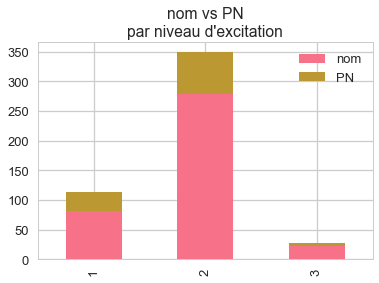

In [898]:
subAXT[["nom","PN"]].plot(kind="bar",stacked=True,
                         title=u"nom vs PN\npar niveau d'excitation")
plt.savefig(u"BC-nomPN-Excitation", dpi=150, bbox_inches="tight")

# Distribution des dénominations par émotion

In [899]:
dfNomsMatch[u"émotion"]

timeline
3000.0      NaN
3100.0      NaN
3200.0      NaN
3220.0         
3254.0      NaN
3300.0      NaN
3349.0      NaN
3400.0      NaN
3479.0      NaN
3500.0      NaN
3513.0      NaN
3569.0      NaN
3588.0      NaN
3600.0      NaN
3616.0         
3639.0      NaN
3668.0      NaN
3694.0      NaN
3700.0      NaN
3793.0      NaN
3800.0      NaN
3806.0      NaN
3850.0      NaN
3900.0      NaN
3934.0      NaN
3960.0         
4000.0      NaN
4042.0      NaN
4070.0      NaN
4100.0      NaN
           ... 
637350.0    NaN
637370.0    NaN
637400.0    NaN
637500.0    NaN
637600.0    NaN
637695.0    NaN
637700.0    NaN
637734.0    NaN
637785.0    NaN
637800.0    NaN
637813.0    NaN
637879.0    NaN
637900.0    NaN
637906.0    NaN
638000.0    NaN
638100.0    NaN
638149.0    NaN
638158.0    NaN
638200.0    NaN
638224.0    NaN
638300.0    NaN
638362.0    NaN
638363.0    NaN
638400.0    NaN
638500.0    NaN
638589.0    NaN
638600.0    NaN
638652.0    NaN
638664.0    NaN
638700.0    NaN
Name: émotion, 

# Emotions dans les tours avec Entité Nommée

In [900]:
emotionsCuts

['',
 u'admiration',
 u'admiration,d\xe9ception',
 u'satisfaction',
 u'inqui\xe9tude',
 'espoir',
 u'soulagement',
 u'd\xe9ception',
 'agacement',
 u'amusement',
 'regret',
 'enthousiasme']

In [901]:
listeAX=[]
for denom in u"nom PN prénom NN".split(" "):
    dictAX=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())&(dfNomsMatch[denom]!=0)][[u"émotion",denom]].groupby(u"émotion").count()[denom].to_dict()
    seriesAX=[]
    for i in emotionsCuts:
        if i in dictAX:
            seriesAX.append(dictAX[i])
        else:
            seriesAX.append(0)
    listeAX.append(seriesAX)
listeAX
subAX=pd.DataFrame(listeAX)
subAX.index=u"nom PN prénom NN".split(" ")
subColumns=["%s"%r if r!="" else "---" for r in emotionsCuts]
subAX.columns=subColumns
subAX=subAX[ordreEmotions]
subAX

---  satisfaction  admiration  espoir  déception  agacement  \
nom     301            20          16      13         10          7   
PN       88             4           7       3          3          0   
prénom    9             0           0       0          1          0   
NN       10             1           0       0          0          0   

        inquiétude  admiration,déception  enthousiasme  soulagement  regret  \
nom              7                     2             1            0       1   
PN               0                     1             1            1       0   
prénom           0                     0             0            0       0   
NN               0                     0             0            0       0   

        amusement  
nom             0  
PN              0  
prénom          0  
NN              0

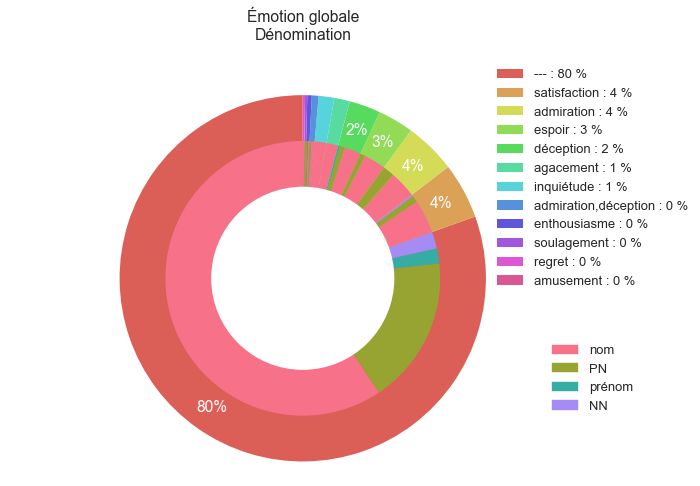

In [902]:
dfAX=pd.DataFrame(subAX.sum())
subWedges=[r.tolist() for ix,r in subAX.iterrows()]
donuts(dfAX,0,dfAX.T.columns,u"nom PN prénom NN".split(" "),subWedges,
       u"Émotion globale\nDénomination",
       intPalette="husl",
       extPalette="hls",
       figsize=(10,7),
       pctMin=2,
      )

In [903]:
dfAX0=pd.DataFrame(subAX[subAX.columns[1:]].sum().sort_values(0,ascending=False))
subAX0=subAX[ordreEmotions0]
ordreEmotions0=dfAX0.T.columns.tolist()
ordreEmotions=["---"]+ordreEmotions0

In [904]:
ordreEmotions

['---',
 u'satisfaction',
 u'admiration',
 'espoir',
 u'd\xe9ception',
 u'inqui\xe9tude',
 'agacement',
 u'admiration,d\xe9ception',
 'enthousiasme',
 'regret',
 u'soulagement',
 u'amusement']

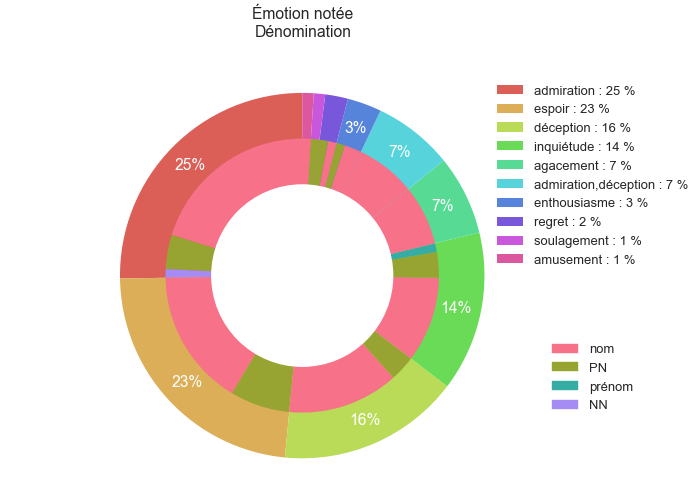

In [918]:

#dfAX=pd.DataFrame(subAX[subAX.columns[1:]].sum().sort_values(0,ascending=False))
subWedges=[r.tolist() for ix,r in subAX0.iterrows()]
donuts(dfAX0,0,dfAX0.T.columns[1:],u"nom PN prénom NN".split(" "),subWedges,
       u"Émotion notée\nDénomination",
       intPalette="husl",
       extPalette="hls",
       figsize=(10,7),
       pctMin=2,
      )

# Emotion par joueur

In [919]:
dfNomsMatch["joueursDec"]=dfNomsMatch["joueurs"].str.encode("utf8")
dfNomsMatch[dfNomsMatch["joueursDec"].notnull()]

Spk                   noms  \
timeline                                
3616.0    spk1           David Skrela   
4232.0    spk1                Roncero   
4456.0    spk1                 Pichot   
4656.0    spk1              Hernandez   
7144.0    spk1         Raphaël Ibañez   
8120.0    spk1                 Pichot   
8472.0    spk1         Cédric Heymans   
8844.0    spk1                 Pichot   
9092.0    spk1                Heymans   
9596.0    spk1           David Skrela   
9920.0    spk3                Thierry   
10000.0   spk2         Agustin Pichot   
11104.0   spk2                Heymans   
11740.0   spk2                Ledesma   
11872.0   spk1    Mario Ledesma,Mario   
13568.0   spk1                Ledesma   
14360.0   spk1              Hernandez   
14744.0   spk1         Cédric Heymans   
16056.0   spk1  Juan Martin Hernandez   
16480.0   spk1         Cédric Heymans   
18164.0   spk2              Hernandez   
19068.0   spk1          Mario Ledesma   
19872.0   spk1            Rémy Martin   
20468.0   spk1               Albacete   
20716.0   spk1        Fernandez Lobbe   
21956.0   spk1              Hernandez   
22336.0   spk1     Hernandez,Dominici   
23160.0   spk1                Mignoni   
23464.0   spk1            de Villiers   
23808.0   spk1     Pieter de Villiers   
...        ...                    ...   
577614.0  spk1     Dimitri Szarzewski   
580710.0  spk1                 Pelous   
580858.0  spk1          Pelous,Ibañez   
582162.0  spk1                 Chabal   
583170.0  spk1                 Pichot   
583262.0  spk1              Hernandez   
583430.0  spk1             Szarzewski   
583722.0  spk2                 Chabal   
583778.0  spk1                 Chabal   
584082.0  spk1                 Betsen   
584586.0  spk1                  Serge   
584658.0  spk2                 Betsen   
584849.0  spk2                 Chabal   
585766.0  spk2    Betsen,Serge Betsen   
586310.0  spk2                 Chabal   
586745.0  spk3  Betsen,Raphaël Ibañez   
587162.0  spk3           David Skrela   
587478.0  spk1                Fabrice   
588014.0  spk1           David Skrela   
588470.0  spk1          Ibañez,Pelous   
588658.0  spk1                 Betsen   
590018.0  spk2  Szarzewski,Szarzewski   
590926.0  spk1                 Betsen   
591322.0  spk1                 Chabal   
591686.0  spk1              Contepomi   
593066.0  spk3          Fred Michalak   
593562.0  spk3                  David   
593658.0  spk3                 Skrela   
593710.0  spk1           David Skrela   
594530.0  spk1      Frédéric Michalak   

                                                  joueurs  excitation  \
timeline                                                                
3616.0                                    David Skrela=Fr         2.0   
4232.0                                 Rodrigo Roncero=Ar         2.0   
4456.0                                  Agustín Pichot=Ar         2.0   
4656.0                           Juan Martín Hernández=Ar         2.0   
7144.0                                  Raphaël Ibañez=Fr         2.0   
8120.0                                  Agustín Pichot=Ar         2.0   
8472.0                                  Cédric Heymans=Fr         2.0   
8844.0                                  Agustín Pichot=Ar         2.0   
9092.0                                  Cédric Heymans=Fr         2.0   
9596.0                                    David Skrela=Fr         2.0   
9920.0                                 Thierry Gilardi=Ot         0.0   
10000.0                                 Agustín Pichot=Ar         2.0   
11104.0                                 Cédric Heymans=Fr         2.0   
11740.0                                  Mario Ledesma=Ar         0.0   
11872.0                                  Mario Ledesma=Ar         2.0   
13568.0                                  Mario Ledesma=Ar         2.0   
14360.0                          Juan Martín Hernández=Ar         2.0   
14744.0                                 

In [920]:
dfNomsMatch[(dfNomsMatch[u"joueursDec"]==u'Rémy Martin=Fr'.encode("utf8"))]#[[u"émotion",u'R\xe9my Martin=Fr']].groupby(u"émotion").count()[u'R\xe9my Martin=Fr']




Spk                     noms         joueurs  excitation  \
timeline                                                              
19872.0   spk1              Rémy Martin  Rémy Martin=Fr    2.000000   
74672.0   spk1              Rémy Martin  Rémy Martin=Fr    4.000000   
76076.0   spk1              Rémy Martin  Rémy Martin=Fr    4.000000   
80968.0   spk2                   Martin  Rémy Martin=Fr    2.000000   
88616.0   spk2                   Martin  Rémy Martin=Fr    0.000000   
181716.0  spk2              Rémy Martin  Rémy Martin=Fr    2.000000   
181864.0  spk1              Rémy Martin  Rémy Martin=Fr    2.000000   
185752.0  spk1              Rémy Martin  Rémy Martin=Fr    4.000000   
190172.0  spk2              Rémy Martin  Rémy Martin=Fr    2.000000   
199140.0  spk2                     Rémy  Rémy Martin=Fr    2.000000   
215932.0  spk1                   Martin  Rémy Martin=Fr    2.000000   
218288.0  spk2                   Martin  Rémy Martin=Fr    0.000000   
232096.0  spk1              Rémy Martin  Rémy Martin=Fr    2.000000   
238160.0  spk2  Rémy Martin,Rémy Martin  Rémy Martin=Fr    2.000000   
254780.0  spk1                   Martin  Rémy Martin=Fr    2.000000   
258920.0  spk2                   Martin  Rémy Martin=Fr    2.000000   
260252.0  spk1                   Martin  Rémy Martin=Fr    2.000000   
452110.0  spk1              Rémi Martin  Rémy Martin=Fr    4.000000   
454658.0  spk2              Rémi Martin  Rémy Martin=Fr    2.000000   
455962.0  spk2              Rémi Martin  Rémy Martin=Fr    2.000000   
458802.0  spk1                   Martin  Rémy Martin=Fr    2.000000   
524230.0  spk1                   Martin  Rémy Martin=Fr    2.000000   
538349.0  spk1                   Martin  Rémy Martin=Fr    1.258865   
552578.0  spk1                   Martin  Rémy Martin=Fr    2.000000   
564382.0  spk1              Rémy Martin  Rémy Martin=Fr    2.000000   

               émotion                  discours  \
timeline                                           
19872.0                     narration suspensive   
74672.0                                narration   
76076.0      déception                 narration   
80968.0     admiration                 narration   
88616.0   satisfaction  point de vue,explication   
181716.0                               narration   
181864.0                               narration   
185752.0    admiration                 narration   
190172.0                               narration   
199140.0                               narration   
215932.0                               narration   
218288.0                               narration   
232096.0                               narration   
238160.0                               narration   
254780.0                    narration suspensive   
258920.0                             description   
260252.0                    narration suspensive   
452110.0                               narration   
454658.0                    narration suspensive   
455962.0                             explication   
458802.0                               narration   
524230.0                    narration suspensive   
538349.0        espoir                 narration   
552578.0        espoir                 narration   
564382.0                               narration   

                                                      texte  texte-PxP  \
timeline                                                                 
19872.0   joue plutôt en fond de touche où Rémy Martin a...        1.0   
74672.0                                    avec Rémy Martin        1.0   
76076.0                             il est pris Rémy Martin        1.0   
80968.0   boum ça c'est du Martin trois Argentins mais i...        1.0   
88616.0   ça c'est bien ce que Martin fait parce qu'il l...        1.0   
181716.0                          ah c'est bien Rémy Martin        1.0   
181864.0               Rémy Martin qui l'a chipé c'est bien        1.0   
185752.0              

In [921]:
ordreEmotions

['---',
 u'satisfaction',
 u'admiration',
 'espoir',
 u'd\xe9ception',
 u'inqui\xe9tude',
 'agacement',
 u'admiration,d\xe9ception',
 'enthousiasme',
 'regret',
 u'soulagement',
 u'amusement']

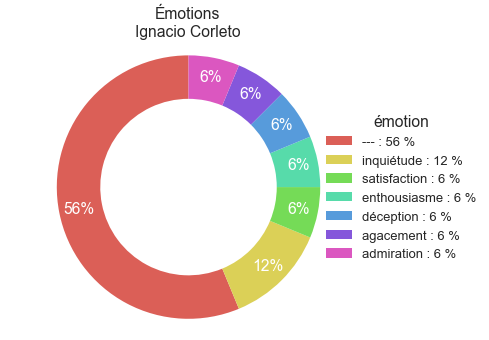

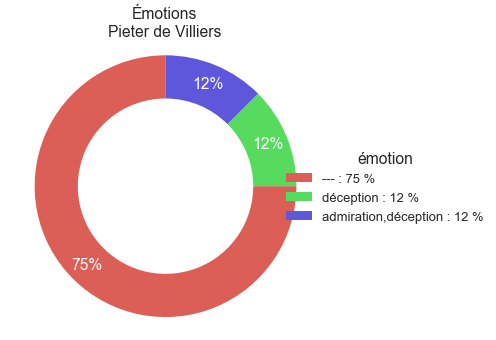

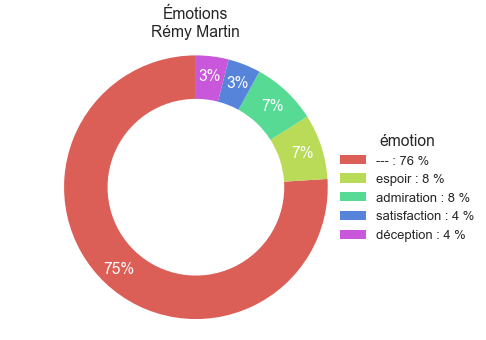

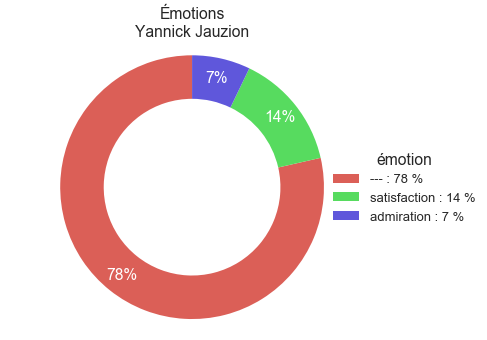

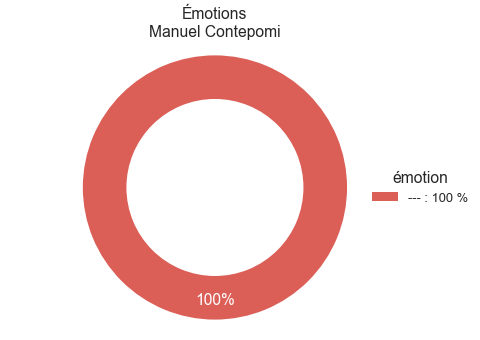

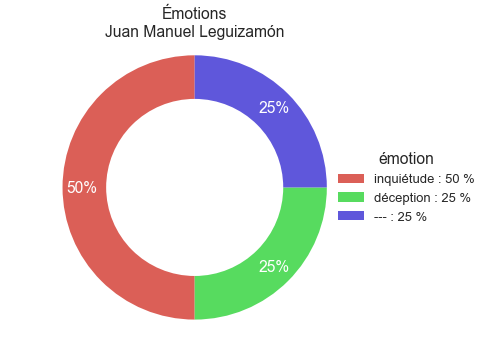

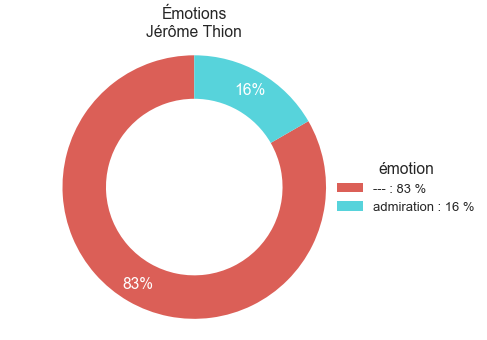

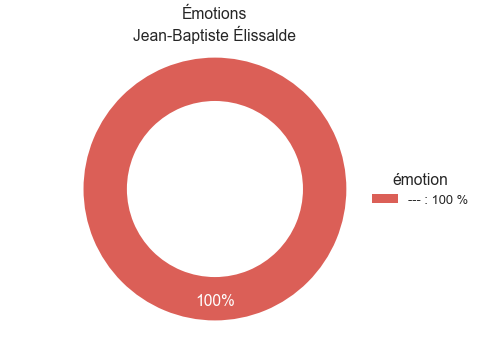

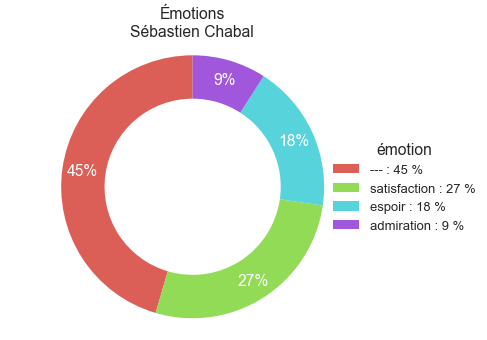

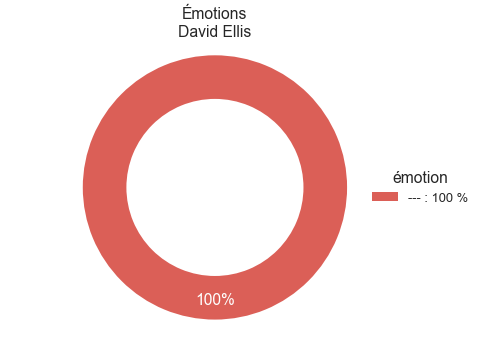

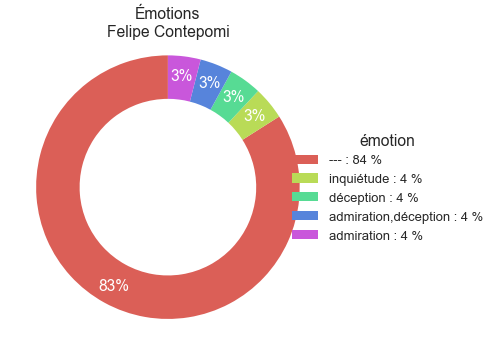

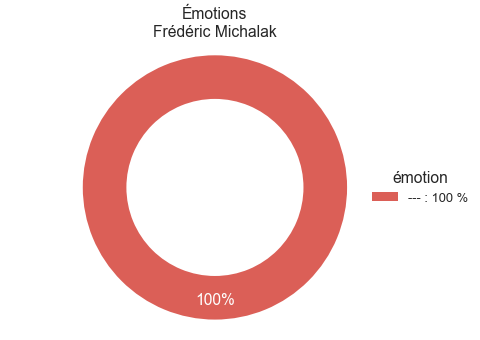

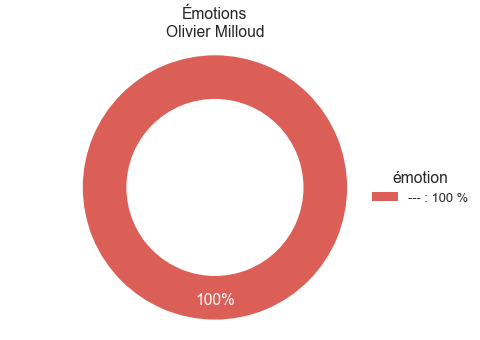

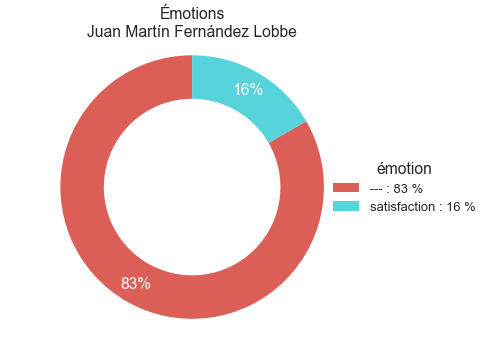

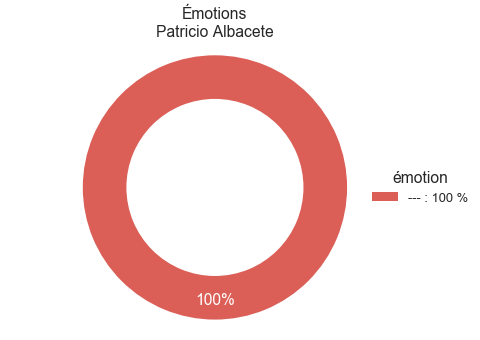

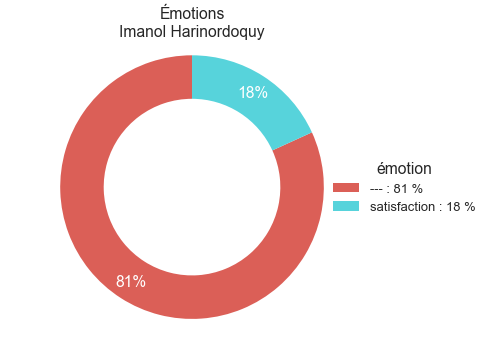

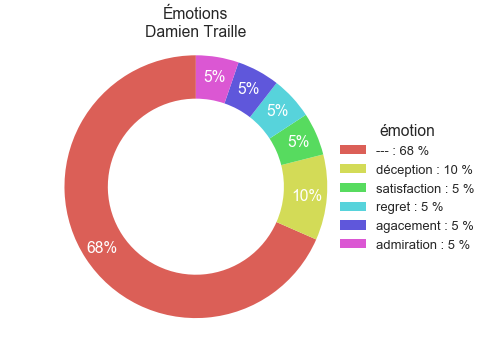

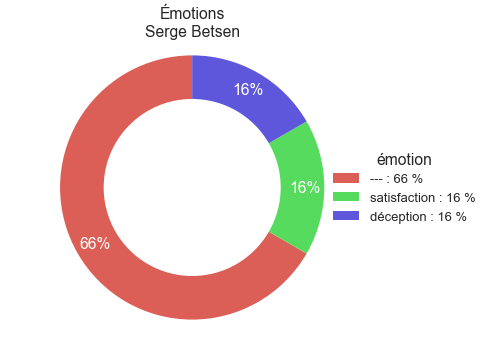

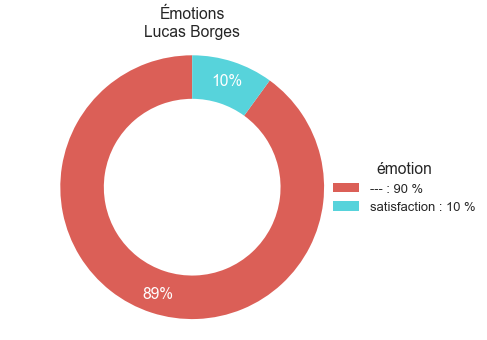

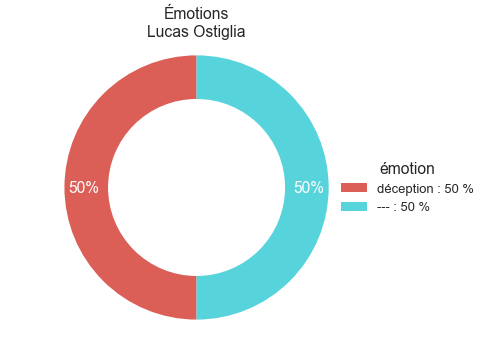

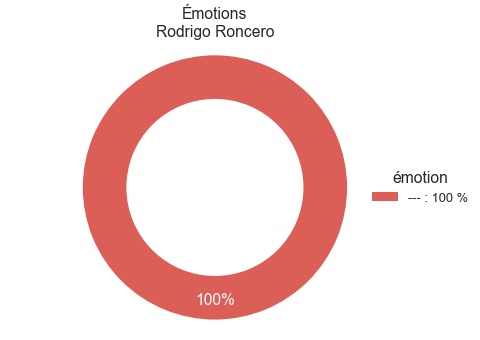

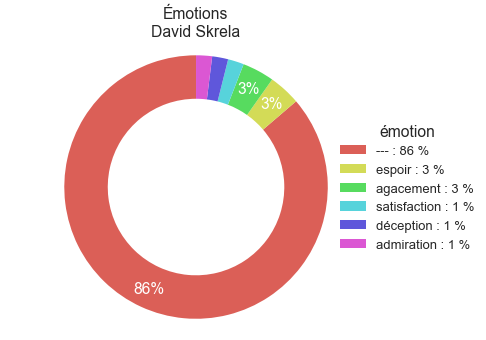

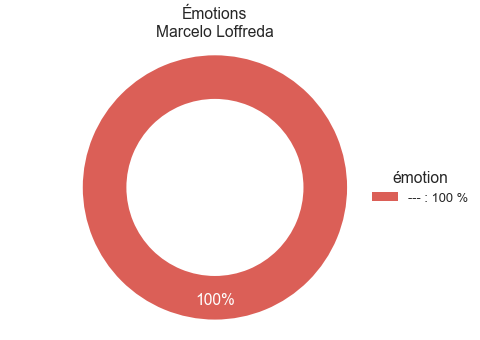

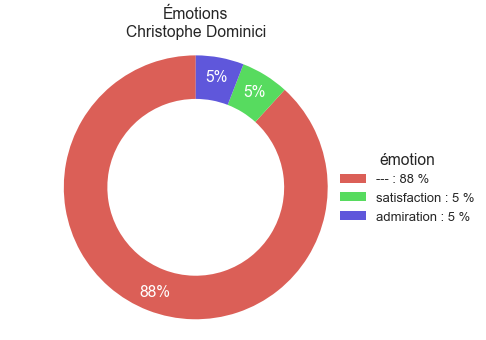

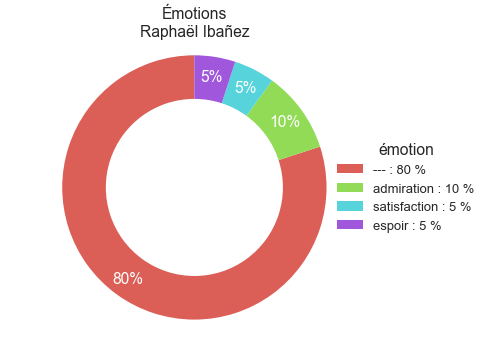

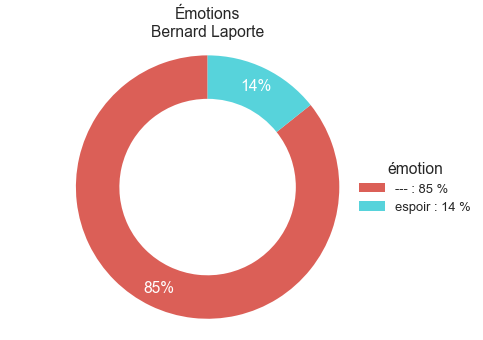

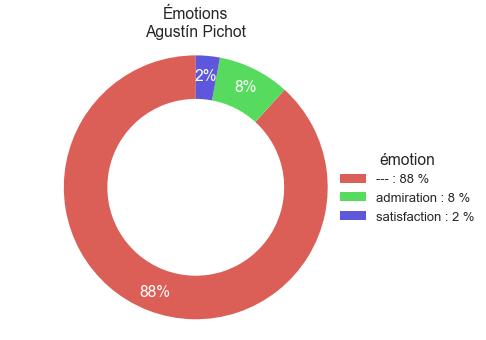

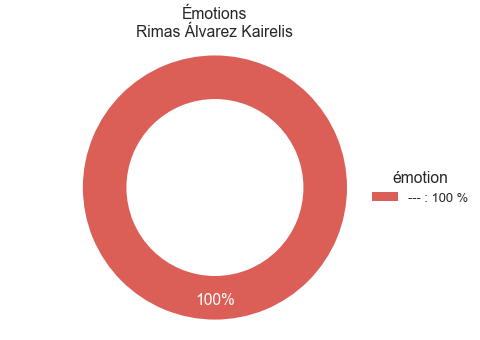

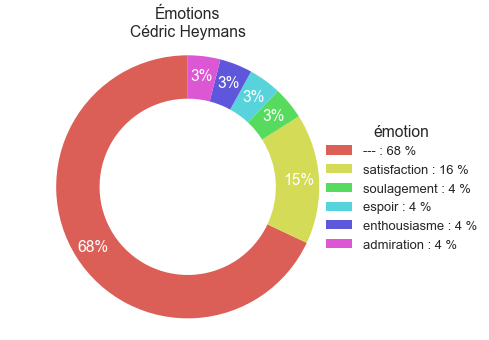

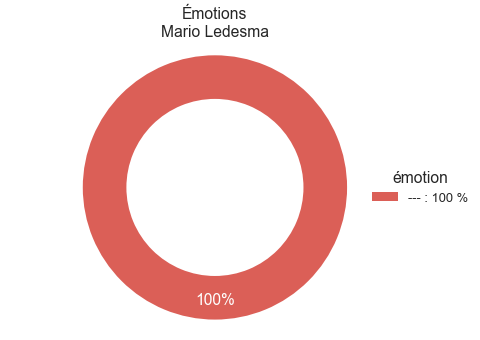

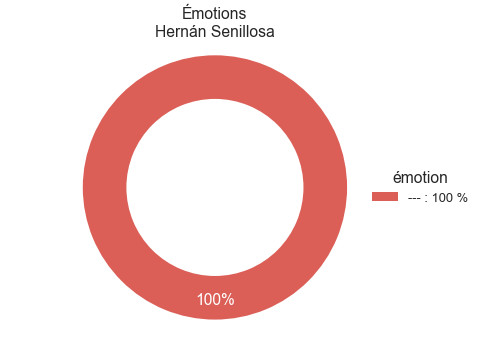

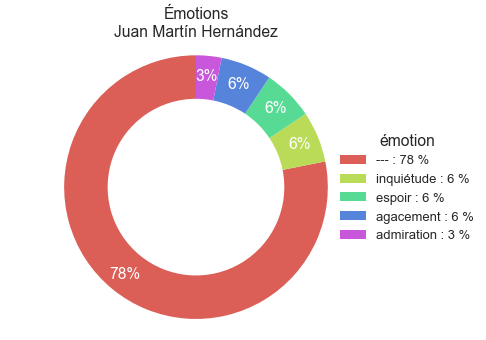

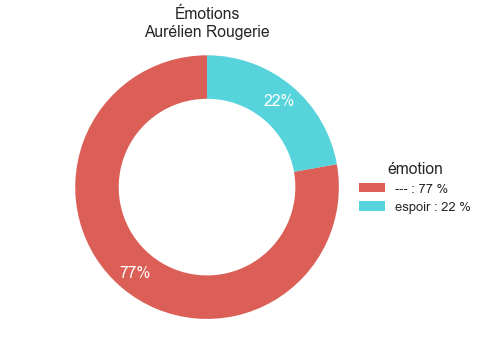

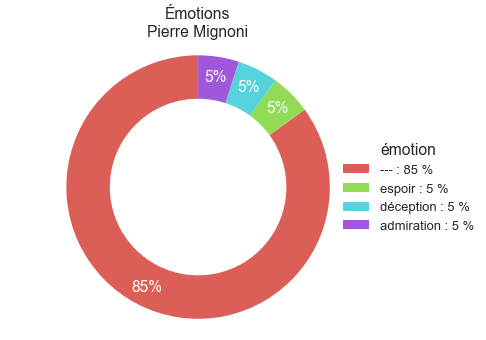

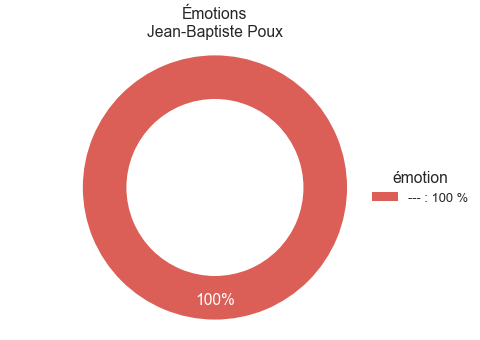

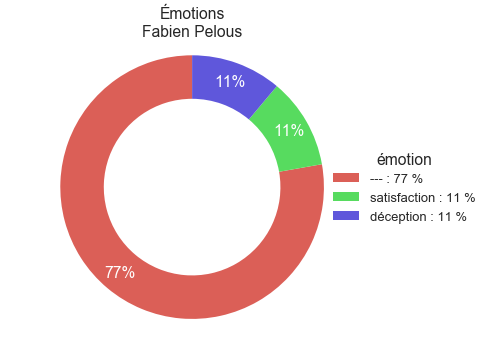

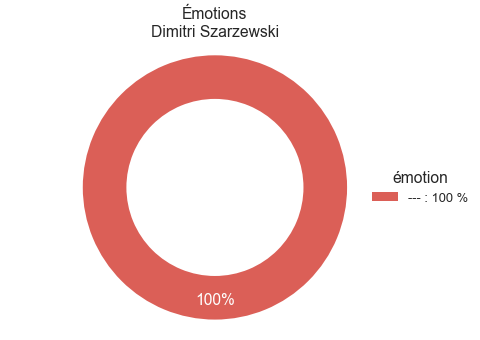

In [922]:
listeAX=[]
for j in joueurDenominationsAcc:
    dfAXj=dfNomsMatch[(dfNomsMatch["joueursDec"].notnull())&(dfNomsMatch["joueursDec"]==j.encode("utf8"))][[u"émotion",j]].groupby(u"émotion").count()[j].sort_values(ascending=False)
#    display(dfAXj)
    legendAXj=["%s"%r if r!="" else "---" for r in dfAXj.index.tolist()]
    if len(dfAXj)>0:
        donut(dfAXj,0,None,legendAXj,u"Émotions\n%s"%joueurDenominationsAcc[j][1],titleLegend=u"émotion",pctMin=2,palette="hls")
    dictAX=dfAXj.to_dict()
    seriesAX=[]
    for i in ordreEmotions:
        if i in dictAX:
            seriesAX.append(dictAX[i])
        elif i=="---" and len(dictAX)>0:
            seriesAX.append(dictAX[""])
        else:
            seriesAX.append(0)
    listeAX.append(seriesAX)
listeAX
subAX=pd.DataFrame(listeAX)
subAX.index=joueurDenominationsAcc
subColumns=["%s"%r if r!="" else "---" for r in emotionsCuts]
subAX.columns=subColumns
subAX=subAX[ordreEmotions]

In [923]:
subAX["total"]=subAX[ordreEmotions].sum(axis=1)
subAX["total0"]=subAX[ordreEmotions0].sum(axis=1)
subAX[u"émotionPct"]=subAX["total0"]/subAX["total"]
subAX=subAX[subAX["total"]>10].sort_values(u"émotionPct",ascending=False)
subAX

---  satisfaction  admiration  espoir  déception  \
Sébastien Chabal=Fr         5             2           3       0          0   
Ignacio Corleto=Ar          9             0           1       2          0   
Serge Betsen=Fr             8             0           2       0          0   
Cédric Heymans=Fr          17             1           4       0          0   
Damien Traille=Fr          13             0           1       0          0   
Rémy Martin=Fr             19             2           1       0          0   
Juan Martín Hernández=Ar   25             2           0       2          0   
Yannick Jauzion=Fr         11             0           2       0          0   
Raphaël Ibañez=Fr          16             1           1       0          0   
Imanol Harinordoquy=Fr      9             0           2       0          0   
Felipe Contepomi=Ar        21             0           0       1          1   
Pierre Mignoni=Fr          34             2           0       0          0   
David Skrela=Fr            44             2           1       0          0   
Christophe Dominici=Fr     15             0           1       0          0   
Agustín Pichot=Ar          30             0           1       0          0   
Mario Ledesma=Ar           16             0           0       0          0   

                          inquiétude  agacement  admiration,déception  \
Sébastien Chabal=Fr                0          0                     1   
Ignacio Corleto=Ar                 1          1                     1   
Serge Betsen=Fr                    2          0                     0   
Cédric Heymans=Fr                  0          1                     1   
Damien Traille=Fr                  2          0                     1   
Rémy Martin=Fr                     1          0                     2   
Juan Martín Hernández=Ar           0          0                     1   
Yannick Jauzion=Fr                 0          0                     1   
Raphaël Ibañez=Fr                  0          0                     2   
Imanol Harinordoquy=Fr             0          0                     0   
Felipe Contepomi=Ar                1          0                     1   
Pierre Mignoni=Fr                  2          0                     2   
David Skrela=Fr                    1          0                     1   
Christophe Dominici=Fr             0          0                     1   
Agustín Pichot=Ar                  0          0                     3   
Mario Ledesma=Ar                   0          0                     0   

                          enthousiasme  regret  soulagement  amusement  total  \
Sébastien Chabal=Fr                  0       0            0          0     11   
Ignacio Corleto=Ar                   0       0            1          0     16   
Serge Betsen=Fr                      0       0            0          0     12   
Cédric Heymans=Fr                    0       1            0          0     25   
Damien Traille=Fr                    0       0            1          1     19   
Rémy Martin=Fr                       0       0            0          0     25   
Juan Martín Hernández=Ar             0       0            2          0     32   
Yannick Jauzion=Fr                   0       0            0          0     14   
Raphaël Ibañez=Fr                    0       0            0          0     20   
Imanol Harinordoquy=Fr               0       0            0          0     11   
Felipe Contepomi=Ar                  0       0            0          0     25   
Pierre Mignoni=Fr                    0       0            0          0     40   
David Skrela=Fr                      0       0            2          0     51   
Christophe Dominici=Fr               0       0            0          0     17   
Agustín Pichot=Ar                    0       0            0          0     34   
Mario Ledesma=Ar                     0       0            0          0     16   

                          total0  émotionPct  
Sébastien Chabal=Fr            6

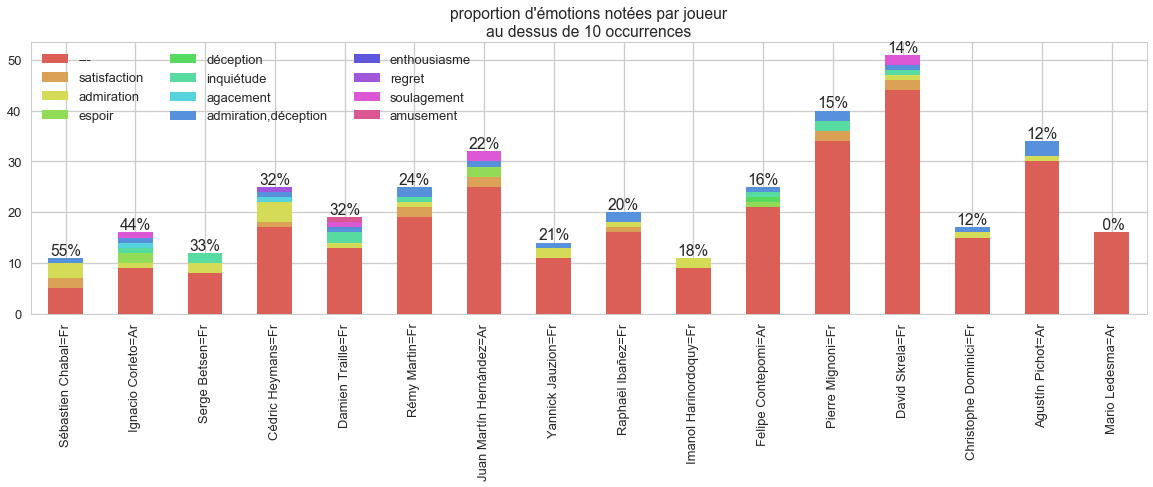

In [924]:
ax=subAX[ordreEmotions].plot(kind="bar",stacked=True,figsize=(20,5),color=sns.color_palette("hls",12),title=u"proportion d'émotions notées par joueur\nau dessus de 10 occurrences")

labels = subAX.sort_values(u"émotionPct",ascending=False)["total"]
rects = ax.patches

for rect, label in zip(rects, labels):
    height = label
    noEmo=rect.get_height()
    value="%2.0f%%"%(round(float(label-noEmo)/label,2)*100)
    ax.text(rect.get_x() + rect.get_width()/2, height, value, ha='center', va='bottom')
    
plt.legend(loc="upper left", bbox_to_anchor=[0, 1],
           ncol=3)
plt.savefig('BC-EmotionsJoueurs-Proportion.png', dpi=150, bbox_inches="tight")
plt.show()

In [925]:
dfNomsMatch[(dfNomsMatch[j].notnull())]#[[u"émotion","texte"]].groupby([u"émotion"]).count()
#joueurDenominations.keys()

Spk          noms          joueurs  excitation émotion   discours  \
timeline                                                                       
3000.0     NaN           NaN              NaN         NaN     NaN        NaN   
3100.0     NaN           NaN              NaN         NaN     NaN        NaN   
3200.0     NaN           NaN              NaN         NaN     NaN        NaN   
3220.0    spk1           NaN              NaN         2.0          narration   
3254.0    spk1           NaN              NaN         2.0     NaN        NaN   
3300.0     NaN           NaN              NaN         2.0     NaN        NaN   
3349.0     NaN           NaN              NaN         2.0     NaN        NaN   
3400.0     NaN           NaN              NaN         2.0     NaN        NaN   
3479.0     NaN           NaN              NaN         2.0     NaN        NaN   
3500.0     NaN           NaN              NaN         2.0     NaN        NaN   
3513.0     NaN           NaN              NaN         2.0     NaN        NaN   
3569.0     NaN           NaN              NaN         2.0     NaN        NaN   
3588.0     NaN           NaN              NaN         2.0     NaN        NaN   
3600.0     NaN           NaN              NaN         2.0     NaN        NaN   
3616.0    spk1  David Skrela  David Skrela=Fr         2.0          narration   
3639.0     NaN           NaN              NaN         2.0     NaN        NaN   
3668.0     NaN           NaN              NaN         2.0     NaN        NaN   
3694.0    spk1           NaN              NaN         2.0     NaN        NaN   
3700.0     NaN           NaN              NaN         2.0     NaN        NaN   
3793.0     NaN           NaN              NaN         2.0     NaN        NaN   
3800.0     NaN           NaN              NaN         2.0     NaN        NaN   
3806.0    spk1           NaN              NaN         2.0     NaN        NaN   
3850.0     NaN           NaN              NaN         2.0     NaN        NaN   
3900.0     NaN           NaN              NaN         2.0     NaN        NaN   
3934.0     NaN           NaN              NaN         2.0     NaN        NaN   
3960.0    spk2           NaN              NaN         2.0          narration   
4000.0     NaN           NaN              NaN         2.0     NaN        NaN   
4042.0    spk2           NaN              NaN         2.0     NaN        NaN   
4070.0    spk2           NaN              NaN         2.0     NaN        NaN   
4100.0     NaN           NaN              NaN         2.0     NaN        NaN   
...        ...           ...              ...         ...     ...        ...   
637350.0   NaN           NaN              NaN         0.0     NaN        NaN   
637370.0  spk2           NaN              NaN         0.0     NaN        NaN   
637400.0   NaN           NaN              NaN         0.0     NaN        NaN   
637500.0   NaN           NaN              NaN         0.0     NaN        NaN   
637600.0   NaN           NaN              NaN         0.0     NaN        NaN   
637695.0   NaN           NaN              NaN         0.0     NaN        NaN   
637700.0   NaN           NaN              NaN         0.0     NaN        NaN   
637734.0  spk1           NaN              NaN         0.0     NaN        NaN   
637785.0   NaN           NaN              NaN         0.0     NaN        NaN   
637800.0   NaN           NaN              NaN         0.0     NaN        NaN   
637813.0   NaN           NaN              NaN         0.0     NaN        NaN   
637879.0   NaN           NaN              NaN         0.0     NaN        NaN   
637900.0   NaN           NaN              NaN         0.0     NaN        NaN   
637906.0   NaN           NaN              NaN         0.0     NaN        NaN   
638000.0   NaN           NaN              NaN         0.0     NaN        NaN   
638100.0   NaN           NaN              NaN         0.0     NaN        NaN   
638149.0   NaN           NaN              NaN         0.0     NaN        NaN   
638158.0  s

In [926]:
dfCSV=dfNomsMatch[[u"émotion","joueurs","texte"]].groupby(["joueurs",u"émotion"]).count()
#dfCSV.to_csv(path_or_buf="TEMP.csv", sep='\t',encoding='utf8')
dfCSV

texte
joueurs                                            émotion            
                                                                     1
Agustín Pichot=Ar                                                   30
                                                   admiration        3
                                                   satisfaction      1
Aurélien Rougerie=Fr                                                 7
                                                   espoir            2
Bernard Laporte=Fr                                                   6
                                                   espoir            1
Christophe Dominici=Fr                                              15
                                                   admiration        1
                                                   satisfaction      1
Christophe Dominici=Fr;Juan Martín Hernández=Ar                      1
Cédric Heymans=Fr                                                   17
                                                   admiration        1
                                                   enthousiasme      1
                                                   espoir            1
                                                   satisfaction      4
                                                   soulagement       1
Cédric Heymans=Fr;Christophe Dominici=Fr                             1
Cédric Heymans=Fr;Thierry Gilardi=Ot;Frédéric M...                   1
Damien Traille=Fr                                                   13
                                                   admiration        1
                                                   agacement         1
                                                   déception         2
                                                   regret            1
                                                   satisfaction      1
Damien Traille=Fr;Christophe Dominici=Fr                             2
Damien Traille=Fr;Cédric Heymans=Fr                                  1
Damien Traille=Fr;Pierre Mignoni=Fr                satisfaction      1
Damien Traille=Fr;Rémy Martin=Fr                   admiration        1
...                                                                ...
Rémy Martin=Fr                                     déception         1
                                                   espoir            2
                                                   satisfaction      1
Rémy Martin=Fr;Cédric Heymans=Fr;Christophe Dom...                   1
Rémy Martin=Fr;David Skrela=Fr;Serge Betsen=Fr     admiration        1
Rémy Martin=Fr;Pierre Mignoni=Fr                                     1
Rémy Martin=Fr;Yannick Jauzion=Fr                                    1
Serge Betsen=Fr                                                      8
                                                   déception         2
                                                   satisfaction      2
Serge Betsen=Fr;Rémy Martin=Fr                     espoir            1
Sébastien Chabal=Fr                                                  5
                                                   admiration        1
                                                   espoir            2
                                                   satisfaction      3
Thierry Dusautoir=Fr;Sébastien Chabal=Fr                             1
Thierry Dusautoir=Fr;Sébastien Chabal=Fr;Dimitr...                   1
Thierry Gilardi=Ot                                                  24
                                                   agacement         1
                                                   regret            1
                                                   satisfaction      1
Thierry Gilardi=Ot;Fabrice Landreau=Ot                               1
Thierry Gilardi=Ot;Mario Ledesma=Ar                                  1
Thierry Lacroix=Ot                                                   4
                  

# Dénominations Fixes
- 15 personnes ont une dénomination fixe
 - la plupart ne sont mentionnés qu'une fois Bonnaire, Elissalde, Ellis, Fernandez Lobbe, Albacete, Loffreda, Maso, Poux
 - les autres ne sont mentionnés que par leurs noms :
   - nom : Contepomi, Leguizamon, Scelzo, Ostiglia, Senillosa, Rougerie
   - NN : Alvarez Kairelis

In [927]:
dfJoueurs[dfJoueurs[u"nom PN prénom NN".split(" ")].max(axis=1)==dfJoueurs["total"]]

nom PN prénom NN total pPrénom pNom pPN pNN
Julien Bonnaire=Fr               0  1      0  0     1       0    0   1   0
Manuel Contepomi=Ar              2  0      0  0     2       0    1   0   0
Juan Manuel Leguizamón=Ar        4  0      0  0     4       0    1   0   0
Jo Maso=Fr                       1  0      0  0     1       0    1   0   0
Jean-Baptiste Élissalde=Fr       0  1      0  0     1       0    0   1   0
Ignacio Fernández Lobbe=Ar       0  0      0  1     1       0    0   0   1
Martín Scelzo=Ar                 2  0      0  0     2       0    1   0   0
Juan Martín Fernández Lobbe=Ar   0  0      0  9     9       0    0   0   1
Patricio Albacete=Ar             1  0      0  0     1       0    1   0   0
David Ellis=En                   0  1      0  0     1       0    0   1   0
Lucas Ostiglia=Ar                3  0      0  0     3       0    1   0   0
Marcelo Loffreda=Ar              1  0      0  0     1       0    1   0   0
Rimas Álvarez Kairelis=Ar        0  0      0  2     2       0    0   0   1
Hernán Senillosa=Ar              3  0      0  0     3       0    1   0   0
Aurélien Rougerie=Fr             9  0      0  0     9       0    1   0   0
Jean-Baptiste Poux=Fr            0  1      0  0     1       0    0   1   0

# Dénominations variables
- 27 personnes sont nommées de façon différente suivant les occurrences 
 - parmi celles-ci, 12 sont nommées au moins 10 fois avec au moins 10% de PN (prénom nom)

In [928]:
dfJoueurs[dfJoueurs[u"nom PN prénom NN".split(" ")].max(axis=1)!=dfJoueurs["total"]]

nom  PN prénom NN total    pPrénom      pNom  \
Ignacio Corleto=Ar        15   1      0  0    16          0    0.9375   
Pieter de Villiers=Fr      5   7      0  0    12          0  0.416667   
Rémy Martin=Fr            18  13      1  0    32    0.03125    0.5625   
Yannick Jauzion=Fr        17   1      0  0    18          0  0.944444   
Jérôme Thion=Fr            4   2      0  0     6          0  0.666667   
Sébastien Chabal=Fr       10   4      0  0    14          0  0.714286   
Serge Betsen=Fr           15   2      1  0    18  0.0555556  0.833333   
Frédéric Michalak=Fr       2   2      0  0     4          0       0.5   
Olivier Milloud=Fr         0   1      1  0     2        0.5         0   
Imanol Harinordoquy=Fr    11   1      0  0    12          0  0.916667   
Damien Traille=Fr         18   9      0  0    27          0  0.666667   
Lucas Borges=Ar            7   3      0  0    10          0       0.7   
Rodrigo Roncero=Ar         5   1      0  0     6          0  0.833333   
David Skrela=Fr           35  20      2  0    57  0.0350877  0.614035   
Christophe Dominici=Fr    23   1      0  0    24          0  0.958333   
Raphaël Ibañez=Fr         17   7      1  0    25       0.04      0.68   
Bernard Laporte=Fr         2   7      1  0    10        0.1       0.2   
Agustín Pichot=Ar         31   6      0  0    37          0  0.837838   
Cédric Heymans=Fr         22   7      0  0    29          0  0.758621   
Mario Ledesma=Ar          13   4      1  0    18  0.0555556  0.722222   
Juan Martín Hernández=Ar  37   1      0  0    38          0  0.973684   
Thierry Dusautoir=Fr       1   1      0  0     2          0       0.5   
Pierre Mignoni=Fr         48   1      0  0    49          0  0.979592   
Felipe Contepomi=Ar       20   6      0  0    26          0  0.769231   
Fabien Pelous=Fr          11   2      2  0    15   0.133333  0.733333   
Dimitri Szarzewski=Fr      4   2      0  0     6          0  0.666667   

                                pPN pNN  
Ignacio Corleto=Ar           0.0625   0  
Pieter de Villiers=Fr      0.583333   0  
Rémy Martin=Fr              0.40625   0  
Yannick Jauzion=Fr        0.0555556   0  
Jérôme Thion=Fr            0.333333   0  
Sébastien Chabal=Fr        0.285714   0  
Serge Betsen=Fr            0.111111   0  
Frédéric Michalak=Fr            0.5   0  
Olivier Milloud=Fr              0.5   0  
Imanol Harinordoquy=Fr    0.0833333   0  
Damien Traille=Fr          0.333333   0  
Lucas Borges=Ar                 0.3   0  
Rodrigo Roncero=Ar         0.166667   0  
David Skrela=Fr            0.350877   0  
Christophe Dominici=Fr    0.0416667   0  
Raphaël Ibañez=Fr              0.28   0  
Bernard Laporte=Fr              0.7   0  
Agustín Pichot=Ar          0.162162   0  
Cédric Heymans=Fr          0.241379   0  
Mario Ledesma=Ar           0.222222   0  
Juan Martín Hernández=Ar  0.0263158   0  
Thierry Dusautoir=Fr            0.5   0  
Pierre Mignoni=Fr         0.0204082   0  
Felipe Contepomi=Ar        0.230769   0  
Fabien Pelous=Fr           0.133333   0  
Dimitri Szarzewski=Fr      0.333333   0

In [929]:
listeDistJoueursNoms=dfJoueurs[(dfJoueurs[u"pPN"]>0.01)&(dfJoueurs[u"nom PN prénom NN".split(" ")].max(axis=1)!=dfJoueurs["total"])&(dfJoueurs["total"]>10)].index.tolist()

In [930]:
for j in listeDistJoueursNoms:
    if j not in joueursSyllabes:
        rawReponse=raw_input("Quels nombres de syllabes pour le prenom et le nom de %s ?"%unidecode.unidecode(j))
        nbSyllPrenom,nbSyllNom=[float(i) for i in rawReponse.split(" ")]
        joueursSyllabes[j]=(nbSyllPrenom,nbSyllNom)
    else:
        print joueursSyllabes[j]

NameError: name 'joueursSyllabes' is not defined

In [934]:
for j in listeDistJoueursNoms:
    print j,joueursSyllabes[j]
    print "PN",dfJoueurs[dfJoueurs.index==j]["pPN"].values[0]
    print "nom",dfJoueurs[dfJoueurs.index==j]["pNom"].values[0]
    display(dfNomsMatch[dfNomsMatch["joueurs"]==j][u"noms texte texte-PxP texte-colour excitation émotion discours RJ5 D5".split(" ")])

Ignacio Corleto=Ar (3.0, 3.0)
PN 0.0625
nom 0.9375


noms                                              texte  \
timeline                                                                       
47248.0           Corleto     forcer Nani Corleto à une relance il y excelle   
47580.0           Corleto                         Nani Corleto une chandelle   
130260.0          Corleto  attention de trouver des touches hein toujours...   
140683.0          Corleto           par contre sa relance trouve euh Corleto   
141083.0          Corleto                       encore en l'air pour Corleto   
141472.0          Corleto                  il a pris le ballon l'ami Corleto   
151700.0          Corleto                                     Corleto est là   
184120.0          Corleto  Corleto qui va faire office de demi de mêlée s...   
186444.0          Corleto               Corleto qui va vite qui va très vite   
186768.0  Ignacio Corleto                            essai d'Ignacio Corleto   
189731.0          Corleto        et les jambes de Corleto font la différence   
191160.0          Corleto  ah les canes comme on dit dans le jargon rugby...   
488030.0          Corleto       par son coéquipier du Stade Français Corleto   
519718.0          Corleto                            le drop de Nani Corleto   
554582.0          Corleto                                  avec Nani Corleto   
554818.0          Corleto                  oh il a été bon là-dessus Corleto   

          texte-PxP texte-colour  excitation       émotion  \
timeline                                                     
47248.0         1.0          NaN    2.000000    admiration   
47580.0         1.0          NaN    2.000000                 
130260.0        NaN            1    1.384615    inquiétude   
140683.0        1.0          NaN    2.000000     déception   
141083.0        1.0          NaN    2.000000                 
141472.0        1.0          NaN    4.000000                 
151700.0        1.0          NaN    2.000000                 
184120.0        1.0          NaN    2.000000                 
186444.0        1.0          NaN    4.000000    inquiétude   
186768.0        1.0          NaN    4.000000  enthousiasme   
189731.0        NaN            1    2.000000     agacement   
191160.0        NaN            1    2.000000                 
488030.0        1.0          NaN    0.000000                 
519718.0        1.0          NaN    2.000000                 
554582.0        1.0          NaN    2.000000                 
554818.0        NaN            1    0.000000  satisfaction   

                                  discours  RJ5   D5  
timeline                                              
47248.0                       point de vue  4.0  3.0  
47580.0                          narration  4.0  3.0  
130260.0  injonction,narration,explication  0.0  4.0  
140683.0                         narration  3.0  3.0  
141083.0                         narration  3.0  3.0  
141472.0              narration suspensive  2.0  4.0  
151700.0                         narration  3.0  1.0  
184120.0                         narration  2.0  2.0  
186444.0                         narration  5.0  4.0  
186768.0                         narration  4.0  4.0  
189731.0                         narration  0.0  5.0  
191160.0                         narration  0.0  6.0  
488030.0                       explication  0.0  4.0  
519718.0                         narration  0.0  3.0  
554582.0                         narration  0.0  3.0  
554818.0                      point de vue  0.0  4.0

Pieter de Villiers=Fr (2.5, 3.0)
PN 0.583333333333
nom 0.416666666667


noms  \
timeline                                   
23464.0                      de Villiers   
23808.0               Pieter de Villiers   
25176.0               Pieter de Villiers   
74852.0               Pieter de Villiers   
201880.0                     de Villiers   
203228.0              Pieter de Villiers   
254336.0  Pieter de Villiers,de Villiers   
490222.0              Pieter de Villiers   

                                                      texte  texte-PxP  \
timeline                                                                 
23464.0                             pour lancer de Villiers        1.0   
23808.0   et pénalité contre l'équipe de France Pieter d...        1.0   
25176.0   ouais effectivement dès que vous allez voir là...        1.0   
74852.0                             avec Pieter de Villiers        1.0   
201880.0                            de Villiers qui insiste        1.0   
203228.0  avec l'arrivée de Pieter de Villiers qui a été...        1.0   
254336.0  et on envoie à Pieter de Villiers repoussé de ...        1.0   
490222.0           Pieter de Villiers souffler un petit peu        NaN   

         texte-colour  excitation               émotion  \
timeline                                                  
23464.0           NaN         2.0                         
23808.0           NaN         2.0             déception   
25176.0           NaN         0.0                         
74852.0           NaN         4.0                         
201880.0          NaN         2.0                         
203228.0          NaN         2.0                         
254336.0          NaN         2.0  admiration,déception   
490222.0            1         2.0                         

                                discours  RJ5   D5  
timeline                                            
23464.0                        narration  3.0  2.0  
23808.0                        narration  3.0  3.0  
25176.0                      explication  0.0  5.0  
74852.0                        narration  NaN  4.0  
201880.0                       narration  1.0  4.0  
203228.0                       narration  5.0  4.0  
254336.0  narration suspensive,narration  2.0  4.0  
490222.0            narration suspensive  0.0  3.0

Rémy Martin=Fr (2.0, 2.0)
PN 0.40625
nom 0.5625


UnicodeEncodeError: 'ascii' codec can't encode character u'\xe9' in position 1: ordinal not in range(128)

In [ ]:
for j in joueursSyllabes:
    dfJoueurs.loc[j,"nbSyllPrenom"]=joueursSyllabes[j][0]
    dfJoueurs.loc[j,"nbSyllNom"]=joueursSyllabes[j][1]
    dfJoueurs.loc[j,"nbSyll"]=joueursSyllabes[j][0]+joueursSyllabes[j][1]
dfJoueurs

In [ ]:
title=u"DistributionDénominationsJoueurs-Long-Nom"
dfAX=dfJoueurs[dfJoueurs.index.isin(joueursSyllabes)].sort_values("nbSyllNom",ascending=True)
fig = plt.figure()
ax=dfAX[["nom","PN"]].plot(kind="bar",stacked=True,figsize=(20,5))
ax.set_ylim((0, 60))
ax.set_ylabel("Nombre d'occurrences")
ax2 = ax.twinx()
ax2.plot(dfAX[["nbSyllNom"]].values)
ax2.set_ylim((0, 6))
ax2.set_ylabel('Nombre de syllabes')
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

In [ ]:
title=u"DistributionDénominationsJoueurs-longNomTotal"
dfAX=dfJoueurs[dfJoueurs.index.isin(joueursSyllabes)].sort_values("nbSyllNom",ascending=True)
fig = plt.figure()
ax=dfAX[["nom","PN"]].plot(kind="bar",stacked=True)
ax2 = ax.twinx()
ax2.plot(dfAX[["nbSyllNom","nbSyll"]].values)
ax2.set_ylim((0, 6))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

In [ ]:
for equipe in ["Fr","Ar"]:
    title=u"DistributionDénominationsJoueurs-longNom-Equipe%s"%equipe
    dfAX=dfJoueurs[(dfJoueurs.index.isin(joueursSyllabes))&(dfJoueurs["equipe"]==equipe)].sort_values("nbSyllNom",ascending=True)
    fig = plt.figure()
    ax=dfAX[["nom","PN"]].plot(kind="bar",stacked=True)
    ax2 = ax.twinx()
    ax2.plot(dfAX[["nbSyllNom"]].values)
    yAX=ax.get_ylim()
    ax2.set_ylim((0, yAX[1]/10))
    plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
    plt.show()

In [931]:
title=u"DistributionDénominationsJoueurs-longPrenom"
dfAX=dfJoueurs[dfJoueurs.index.isin(joueursSyllabes)].sort_values("nbSyllPrenom",ascending=True)
fig = plt.figure()
ax=dfAX[["nom","PN"]].plot(kind="bar",stacked=True)
ax2 = ax.twinx()
ax2.plot(dfAX[["nbSyllPrenom"]].values)
ax2.set_ylim((0, 6))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

NameError: name 'joueursSyllabes' is not defined

In [ ]:
title=u"DistributionDénominationsJoueurs-long"
dfAX=dfJoueurs[dfJoueurs.index.isin(joueursSyllabes)].sort_values("nbSyll",ascending=True)
fig = plt.figure()
ax=dfAX[["nom","PN"]].plot(kind="bar",stacked=True)
ax2 = ax.twinx()
ax2.plot(dfAX[["nbSyll"]].values)
ax2.set_ylim((0, 6))
plt.savefig('BC-%s.png'%(formatNomFichier(title)), dpi=150, bbox_inches="tight")
plt.show()

# Dénominations par équipe

In [935]:
dfJoueurs["equipe"]=dfJoueurs.index.str.split("=").str[1]
dfJoueurs

nom  PN prénom NN total    pPrénom      pNom  \
Ignacio Corleto=Ar              15   1      0  0    16          0    0.9375   
Pieter de Villiers=Fr            5   7      0  0    12          0  0.416667   
Rémy Martin=Fr                  18  13      1  0    32    0.03125    0.5625   
Yannick Jauzion=Fr              17   1      0  0    18          0  0.944444   
Julien Bonnaire=Fr               0   1      0  0     1          0         0   
Manuel Contepomi=Ar              2   0      0  0     2          0         1   
Juan Manuel Leguizamón=Ar        4   0      0  0     4          0         1   
Jo Maso=Fr                       1   0      0  0     1          0         1   
Jérôme Thion=Fr                  4   2      0  0     6          0  0.666667   
Jean-Baptiste Élissalde=Fr       0   1      0  0     1          0         0   
Sébastien Chabal=Fr             10   4      0  0    14          0  0.714286   
Serge Betsen=Fr                 15   2      1  0    18  0.0555556  0.833333   
Ignacio Fernández Lobbe=Ar       0   0      0  1     1          0         0   
Frédéric Michalak=Fr             2   2      0  0     4          0       0.5   
Olivier Milloud=Fr               0   1      1  0     2        0.5         0   
Martín Scelzo=Ar                 2   0      0  0     2          0         1   
Juan Martín Fernández Lobbe=Ar   0   0      0  9     9          0         0   
Patricio Albacete=Ar             1   0      0  0     1          0         1   
Imanol Harinordoquy=Fr          11   1      0  0    12          0  0.916667   
Damien Traille=Fr               18   9      0  0    27          0  0.666667   
David Ellis=En                   0   1      0  0     1          0         0   
Lucas Borges=Ar                  7   3      0  0    10          0       0.7   
Lucas Ostiglia=Ar                3   0      0  0     3          0         1   
Rodrigo Roncero=Ar               5   1      0  0     6          0  0.833333   
David Skrela=Fr                 35  20      2  0    57  0.0350877  0.614035   
Marcelo Loffreda=Ar              1   0      0  0     1          0         1   
Christophe Dominici=Fr          23   1      0  0    24          0  0.958333   
Raphaël Ibañez=Fr               17   7      1  0    25       0.04      0.68   
Bernard Laporte=Fr               2   7      1  0    10        0.1       0.2   
Agustín Pichot=Ar               31   6      0  0    37          0  0.837838   
Rimas Álvarez Kairelis=Ar        0   0      0  2     2          0         0   
Cédric Heymans=Fr               22   7      0  0    29          0  0.758621   
Mario Ledesma=Ar                13   4      1  0    18  0.0555556  0.722222   
Hernán Senillosa=Ar              3   0      0  0     3          0         1   
Juan Martín Hernández=Ar        37   1      0  0    38          0  0.973684   
Thierry Dusautoir=Fr             1   1      0  0     2          0       0.5   
Aurélien Rougerie=Fr             9   0      0  0     9          0         1   
Pierre Mignoni=Fr               48   1      0  0    49          0  0.979592   
Felipe Contepomi=Ar             20   6      0  0    26          0  0.769231   
Jean-Baptiste Poux=Fr            0   1      0  0     1          0         0   
Fabien Pelous=Fr                11   2      2  0    15   0.133333  0.733333   
Dimitri Szarzewski=Fr            4   2      0  0     6          0  0.666667   

                                      pPN pNN equipe  
Ignacio Corleto=Ar                 0.0625   0     Ar  
Pieter de Villiers=Fr            0.583333   0     Fr  
Rémy Martin=Fr                    0.40625   0     Fr  
Yannick Jauzion=Fr              0.0555556   0     Fr  
Julien Bonnaire=Fr                      1   0     Fr  
Manuel Contepomi=Ar                     0   0     Ar  
Juan Manuel Leguizamón=Ar               0   0     Ar  
Jo Maso=Fr                              0   0     Fr  
Jérôme Thion=Fr                  0.333333   0     Fr  
Jean-Baptiste Élissalde=Fr              1   0     Fr  
Sébastien Chabal=Fr         

In [936]:
dfEquipes=dfJoueurs.groupby("equipe")[u"nom PN prénom NN".split(" ")].sum().T
dfEquipes=dfEquipes[["Fr","Ar"]]
dfEquipes

equipe   Fr   Ar
nom     273  144
PN       93   22
prénom    9    1
NN        0   12

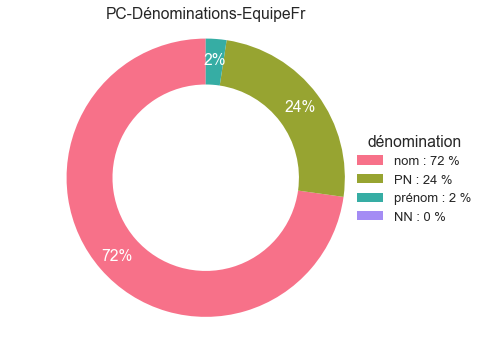

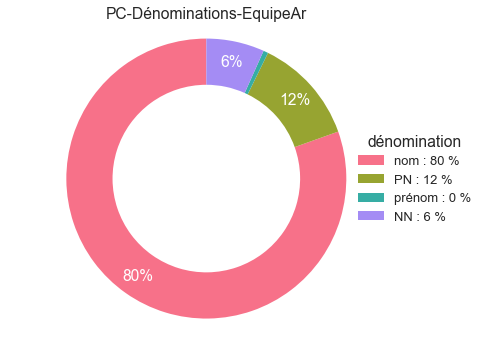

In [937]:
for equipe in dfEquipes.columns:
    donut(dfEquipes,equipe,None,u"nom PN prénom NN".split(" "),u"PC-Dénominations-Equipe%s"%equipe,pctMin=1)

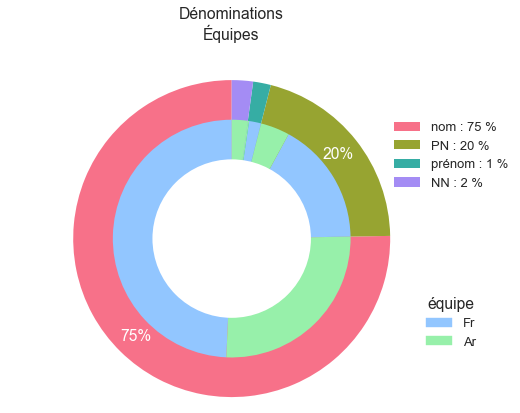

In [954]:
subWedges=[r.tolist() for ix,r in dfEquipes.T.iterrows()]
dfAX=pd.DataFrame(dfEquipes.T[u"nom PN prénom NN".split(" ")].sum())
donuts(dfAX,0,u"nom PN prénom NN".split(" "),
       ["Fr","Ar"],subWedges,
       u"Dénominations\nÉquipes",prepSub=0,
       intPalette="pastel",
       figsize=(7.5,6),
       titreIntLegend=u"équipe",
       pctMin=2,
      )

In [940]:
dfEquipes

equipe   Fr   Ar
nom     273  144
PN       93   22
prénom    9    1
NN        0   12

[[273, 144], [93, 22], [9, 1], [0, 12]]

0
equipe     
Fr      375
Ar      179

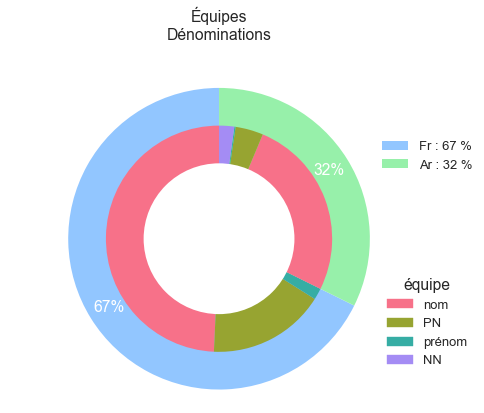

In [952]:
subWedges=[r.tolist() for ix,r in dfEquipes.iterrows()]
display(subWedges)
dfAX=pd.DataFrame(dfEquipes.sum())
display(dfAX)
donuts(dfAX,0,dfAX.index.tolist(),
       u"nom PN prénom NN".split(" "),subWedges,
       u"Équipes\nDénominations",prepSub=0,
       extPalette="pastel",
       intPalette="husl",
       figsize=(7,6),
       titreIntLegend=u"équipe",
       pctMin=2,
      )

# Prénom Nom

In [ ]:
dfPN=dfNomsMatch[(dfNomsMatch["PN"].notnull())&(dfNomsMatch["PN"]!=0)]["texte noms joueurs RJ5 D5 Spk texte-PxP texte-colour".split(" ")]

In [ ]:
dfPN.groupby(["joueurs","noms","Spk"]).count()

# Graphiques

## Corrélation Entités nommées

In [ ]:
print
dfTemp=dfNomsMatch[(dfNomsMatch["joueurs"].notnull())][["noms","début","fin","excitation","texte","discours","Spk","RJ5.00","D5.00"]]
for ix,row in dfTemp.iloc[:250].iterrows():
    print ix,row[["discours","noms","excitation","Spk","RJ5.00","D5.00"]].tolist()


# Graphe F0

In [737]:
dfF0Base=pd.read_csv("France_Argentine_Intro_FR-rawf0.csv",sep="\t")
dfF0Base.columns="label timeline f0".split(" ")

In [738]:
dfF0=dfF0Base[["timeline","f0"]]
dfF0["f0"]=pd.to_numeric(dfF0["f0"], errors='coerce')

/Users/gilles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [739]:
dfF0=dfF0.set_index("timeline")

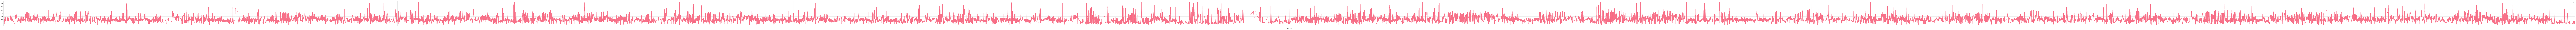

In [740]:
dfF0.plot(figsize=(500,5))

In [741]:
dfTemp=dfNomsMatch[(dfNomsMatch["joueurs"].notnull()) & (dfNomsMatch[joueur]!="0,0,0,0")][["noms",joueur,"début","fin"]]
for ix,row in dfTemp.iloc[:25].iterrows():
    print row["noms"],ix
    try:
        ax=dfF0[(dfF0.index>=row["début"])&(dfF0.index<=row["fin"])].plot(figsize=(10,5))
        plt.show()
    except:
        pass

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

In [531]:
TEMP=pd.DataFrame([u"éric",u"charles"])
TEMP["uni"]=TEMP[0].str.encode("utf8")
TEMP["uni"]==u"éric".encode("utf8")

0     True
1    False
Name: uni, dtype: bool

In [989]:
print dfNomsMatch[(dfNomsMatch[u"émotion"].str.len()>0)&(dfNomsMatch["texte"].notnull())][u"émotion"].count()

397
